In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import verde as vd
import harmonica as hm
import boule as bl
import ensaio
import pygmt
import pyproj


import warnings
warnings.filterwarnings("ignore")

## Carrega os dados grav

In [2]:
# path_gravity = ensaio.fetch_southern_africa_gravity(version=1)
# path_topography = ensaio.fetch_earth_topography(version=1)
# path_geoid  = ensaio.fetch_earth_geoid(version=1)

In [3]:
# data = pd.read_csv(path_gravity)
data = pd.read_csv('gravity_table.csv', delimiter=';')
data

Station     Reading      Time        Date  height_sea_level_m  \
0          1     2239.39  14:28:00  2019/12/03              147.94   
1          2     2239.41  15:12:00  2019/12/03              152.06   
2          3     2246.38  16:06:00  2019/12/03              117.30   
3          4     2245.71  16:46:00  2019/12/03              129.10   
4          5     2249.62  17:13:00  2019/12/03              130.01   
..       ...         ...       ...         ...                 ...   
222      223  2203015.00  17:06:00  2019/12/16              264.94   
223      224  2168435.00  09:38:00  2019/12/17              204.11   
224      225     2164.15  11:52:00  2019/12/17              226.73   
225      226  2135695.00  15:49:00  2019/12/17              443.57   
226      227     2165.48  16:38:00  2019/12/17              293.06   

                 X             Y  longitude   latitude   gravity_mgal  \
0    238246.104213  7.702141e+06 -41.514018 -20.762135  978591.406605   
1    239573.565307  7.702483e+06 -41.501226 -20.759230  978591.445776   
2    241216.748955  7.704176e+06 -41.485206 -20.744179  978598.473518   
3    243071.287960  7.702906e+06 -41.467595 -20.755897  978597.809879   
4    245332.547009  7.701803e+06 -41.446052 -20.766168  978601.745635   
..             ...           ...        ...        ...            ...   
222  245174.133206  7.717189e+06 -41.445344 -20.627243  978555.178643   
223  239604.189758  7.711266e+06 -41.499631 -20.679943  978573.732084   
224  237502.245723  7.711667e+06 -41.519734 -20.676036  978569.446411   
225  240697.890125  7.698939e+06 -41.490961 -20.791377  978540.768876   
226  235344.656608  7.697817e+06 -41.542518 -20.800757  978570.866953   

     TideCorr        Source  
0    0.053423  03122019_996  
1    0.066119  03122019_996  
2    0.077715  03122019_996  
3    0.081974  03122019_996  
4    0.082319  03122019_996  
..        ...           ...  
222  0.096166  16122019_996  
223 -0.030230  17122019_965  
224  0.024382  17122019_965  
225  0.125092  17122019_965  
226  0.119784  17122019_965  

[227 rows x 12 columns]

In [4]:
# print(np.max(data.latitude))
# print(np.min(data.latitude))
# print(np.max(data.longitude))
# print(np.min(data.longitude))


In [5]:
# topography = xr.load_dataarray(path_topography)
# geoid = xr.load_dataarray(path_geoid)

In [6]:
# West, East, South, North (degrees)
# region = (-42, -41, -21, -20)
# region = (-41.5569883888889, -41.2805198611111, -20.8007570833333, -20.5533338333333)
region = (-41.5572222222, -41.2802777778, -20.8008333333, -20.5533333333)
# Pad the region for slicing the grids
region_pad = vd.pad_region(region, pad=0.02)
# region = region_pad

In [7]:
topography = pygmt.datasets.load_earth_relief(resolution="01s", region=region_pad)
topography = topography.rename({'lon': 'longitude', 'lat': 'latitude'})
topography

<xarray.DataArray 'elevation' (latitude: 1051, longitude: 1156)>
array([[772., 763., 752., ..., 137., 134., 128.],
       [783., 771., 760., ..., 136., 132., 126.],
       [789., 779., 764., ..., 134., 129., 122.],
       ...,
       [770., 777., 786., ..., 260., 265., 269.],
       [783., 789., 798., ..., 261., 265., 271.],
       [796., 803., 810., ..., 259., 261., 267.]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.53 -20.53 -20.53
Attributes:
    long_name:         Earth elevation relative to the geoid
    cpt:               geo
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [8]:
# data = data[vd.inside((data.Longitude, data.Latitude), region)]
# data

In [9]:
# geoid = geoid.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
# geoid = -5.6 # constante

In [10]:
topography = topography.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
# topography = topography.sel(lon=slice(*region_pad[:2]), lat=slice(*region_pad[2:]))
topography

<xarray.DataArray 'elevation' (latitude: 1035, longitude: 1140)>
array([[682., 690., 696., ..., 106., 107., 113.],
       [686., 697., 702., ..., 107., 108., 115.],
       [689., 697., 707., ..., 106., 108., 114.],
       ...,
       [820., 806., 795., ..., 279., 281., 281.],
       [827., 816., 806., ..., 280., 283., 286.],
       [830., 821., 812., ..., 288., 294., 301.]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.53 -20.53 -20.53
Attributes:
    long_name:         Earth elevation relative to the geoid
    cpt:               geo
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [11]:
# Criar uma cópia com valores constantes
# constant_value = -5.6
# geoid = topography.copy()
# geoid.values = np.ones(np.shape(topography.values))*constant_value
# geoid

path_geoid  = ensaio.fetch_earth_geoid(version=1)
geoid = xr.load_dataarray(path_geoid)
geoid = geoid.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
interpolator = vd.KNeighbors()

geoid_table = vd.grid_to_table(geoid)
geoid_1 = vd.grid_to_table(topography)


interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.geoid)
geoid_1 = geoid_1.assign(elevation=interpolator.predict((geoid_1.longitude, geoid_1.latitude)))

geoid_values = np.reshape(geoid_1.elevation, topography.shape)
geoid = xr.DataArray(geoid_values, coords=[topography.latitude, topography.longitude], dims=['latitude', 'longitude'])
geoid

<xarray.DataArray (latitude: 1035, longitude: 1140)>
array([[-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       ...,
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.53 -20.53 -20.53
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26

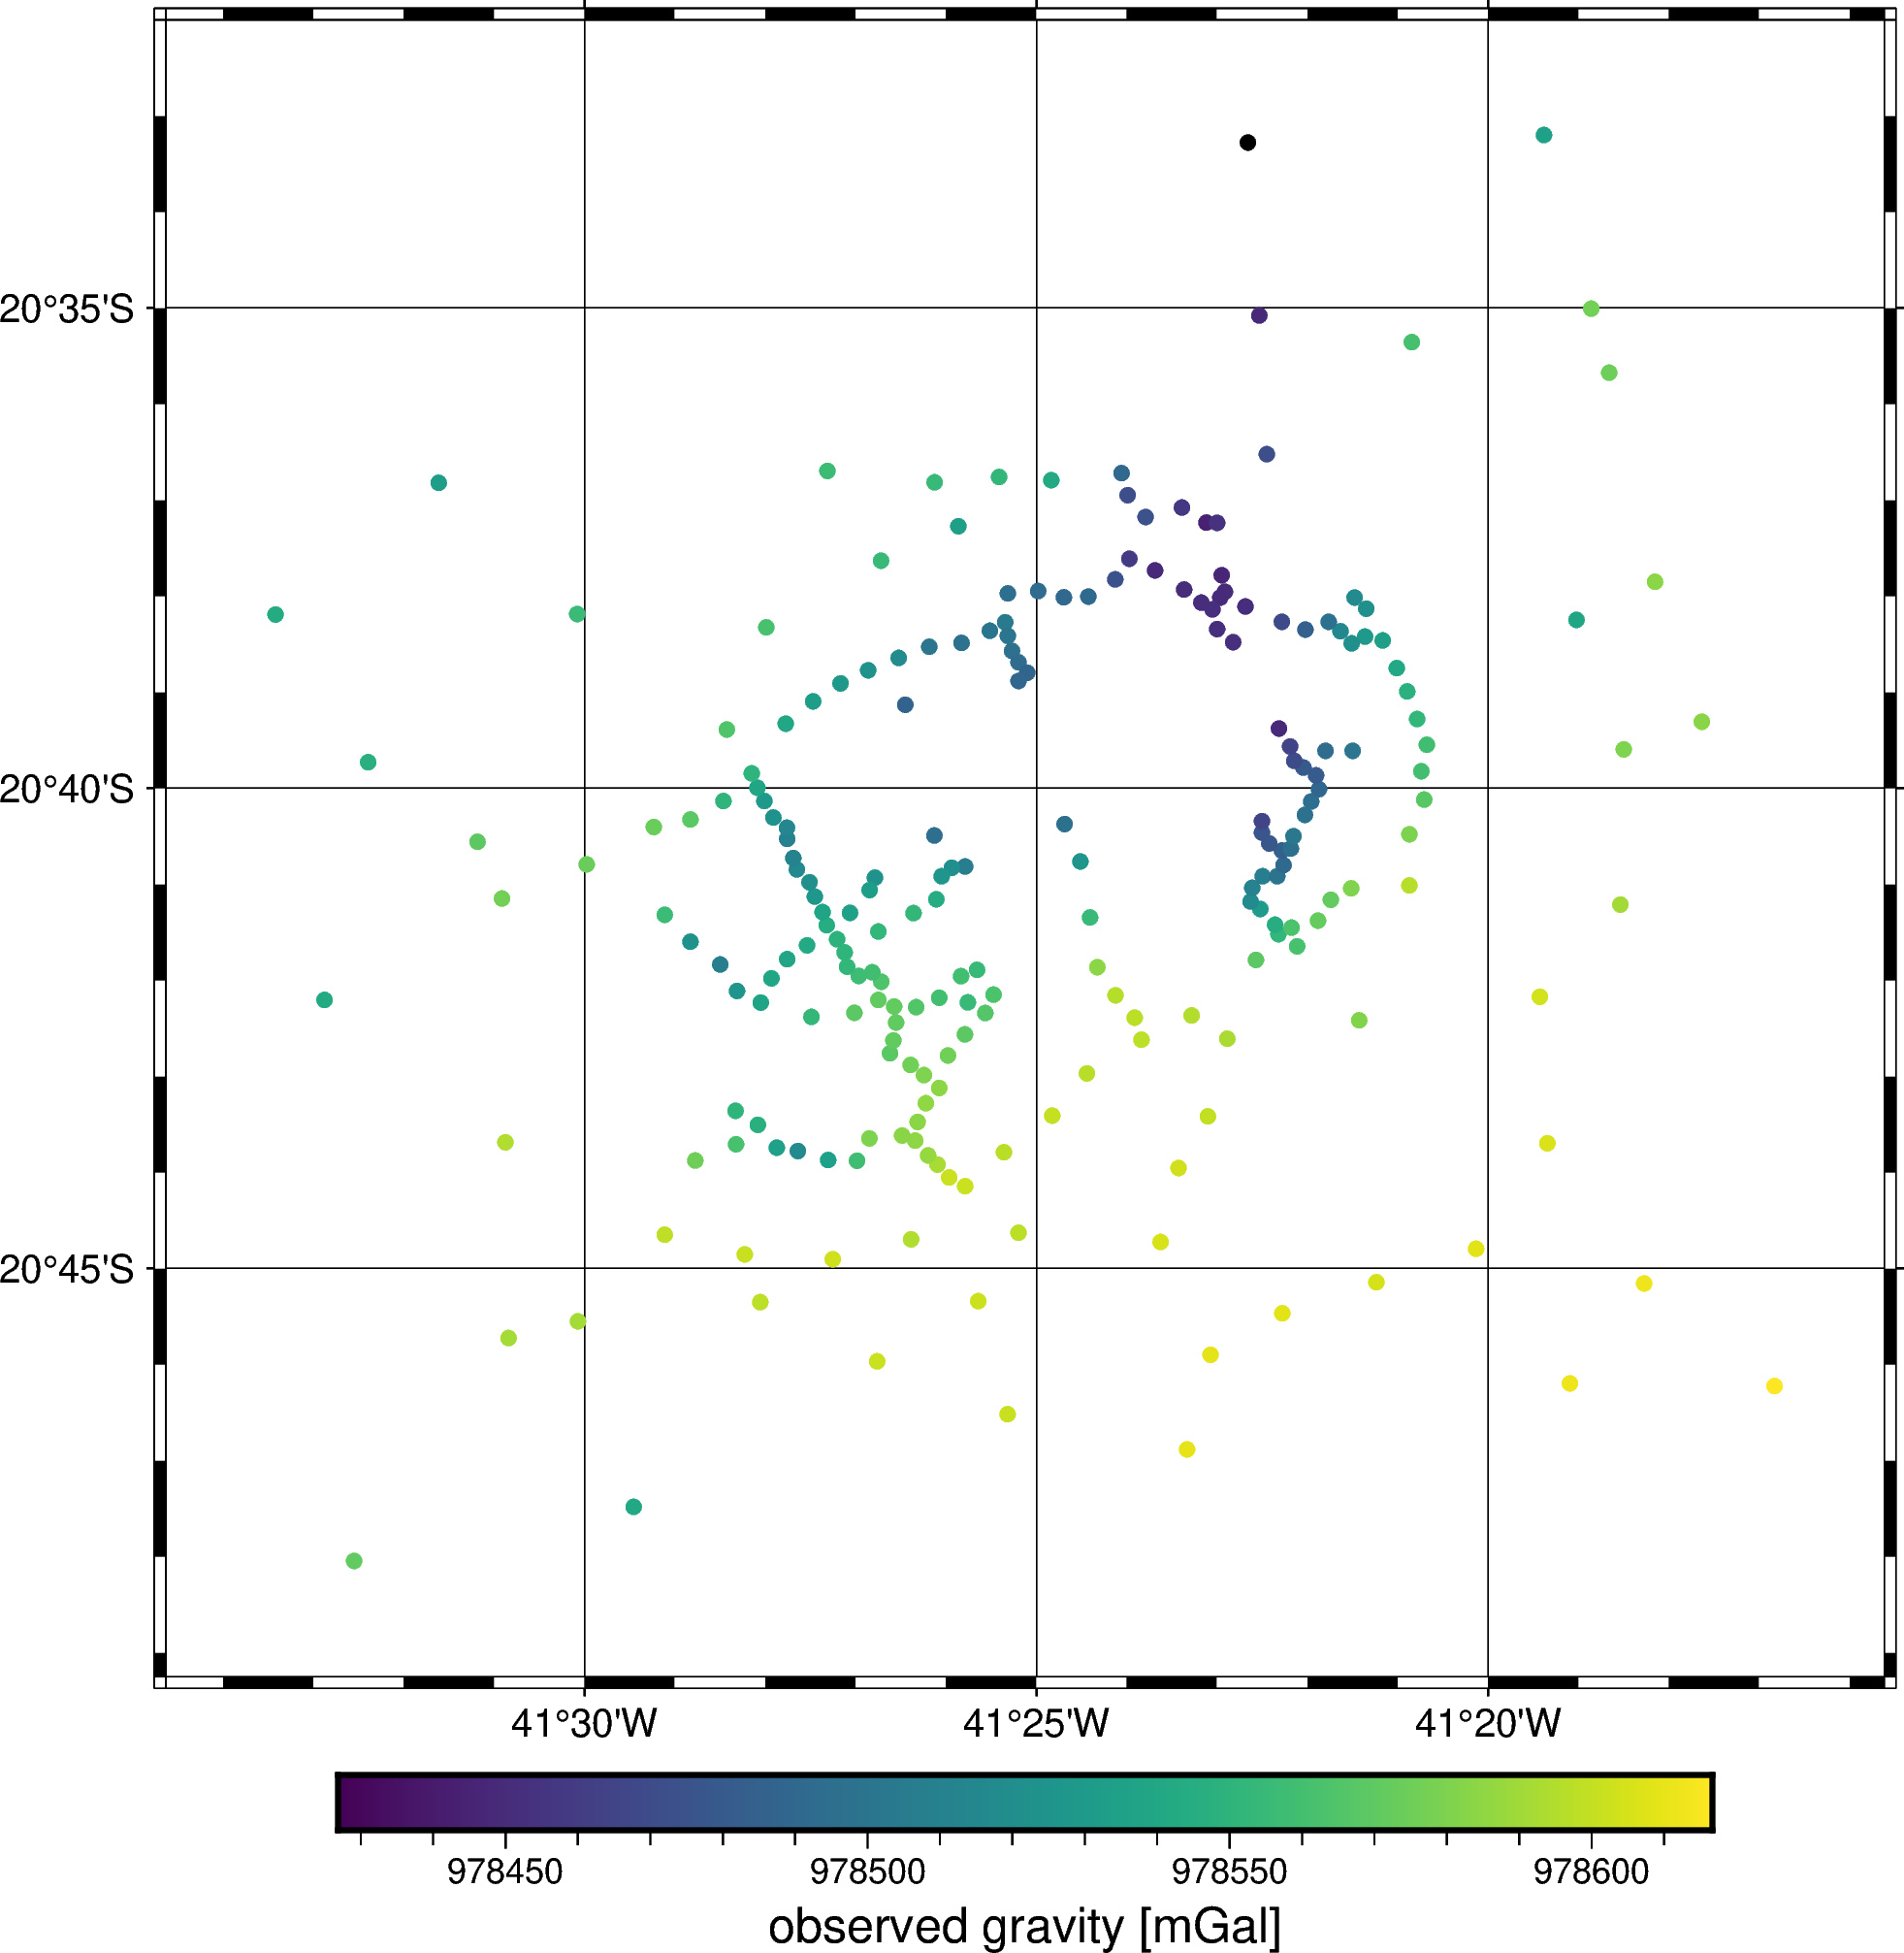

In [12]:
fig = pygmt.Figure()
pygmt.makecpt(cmap="viridis", series=[data.gravity_mgal.min(), data.gravity_mgal.max()])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="afg",
)
fig.colorbar(frame='af+l"observed gravity [mGal]"')
fig.show(width=600)

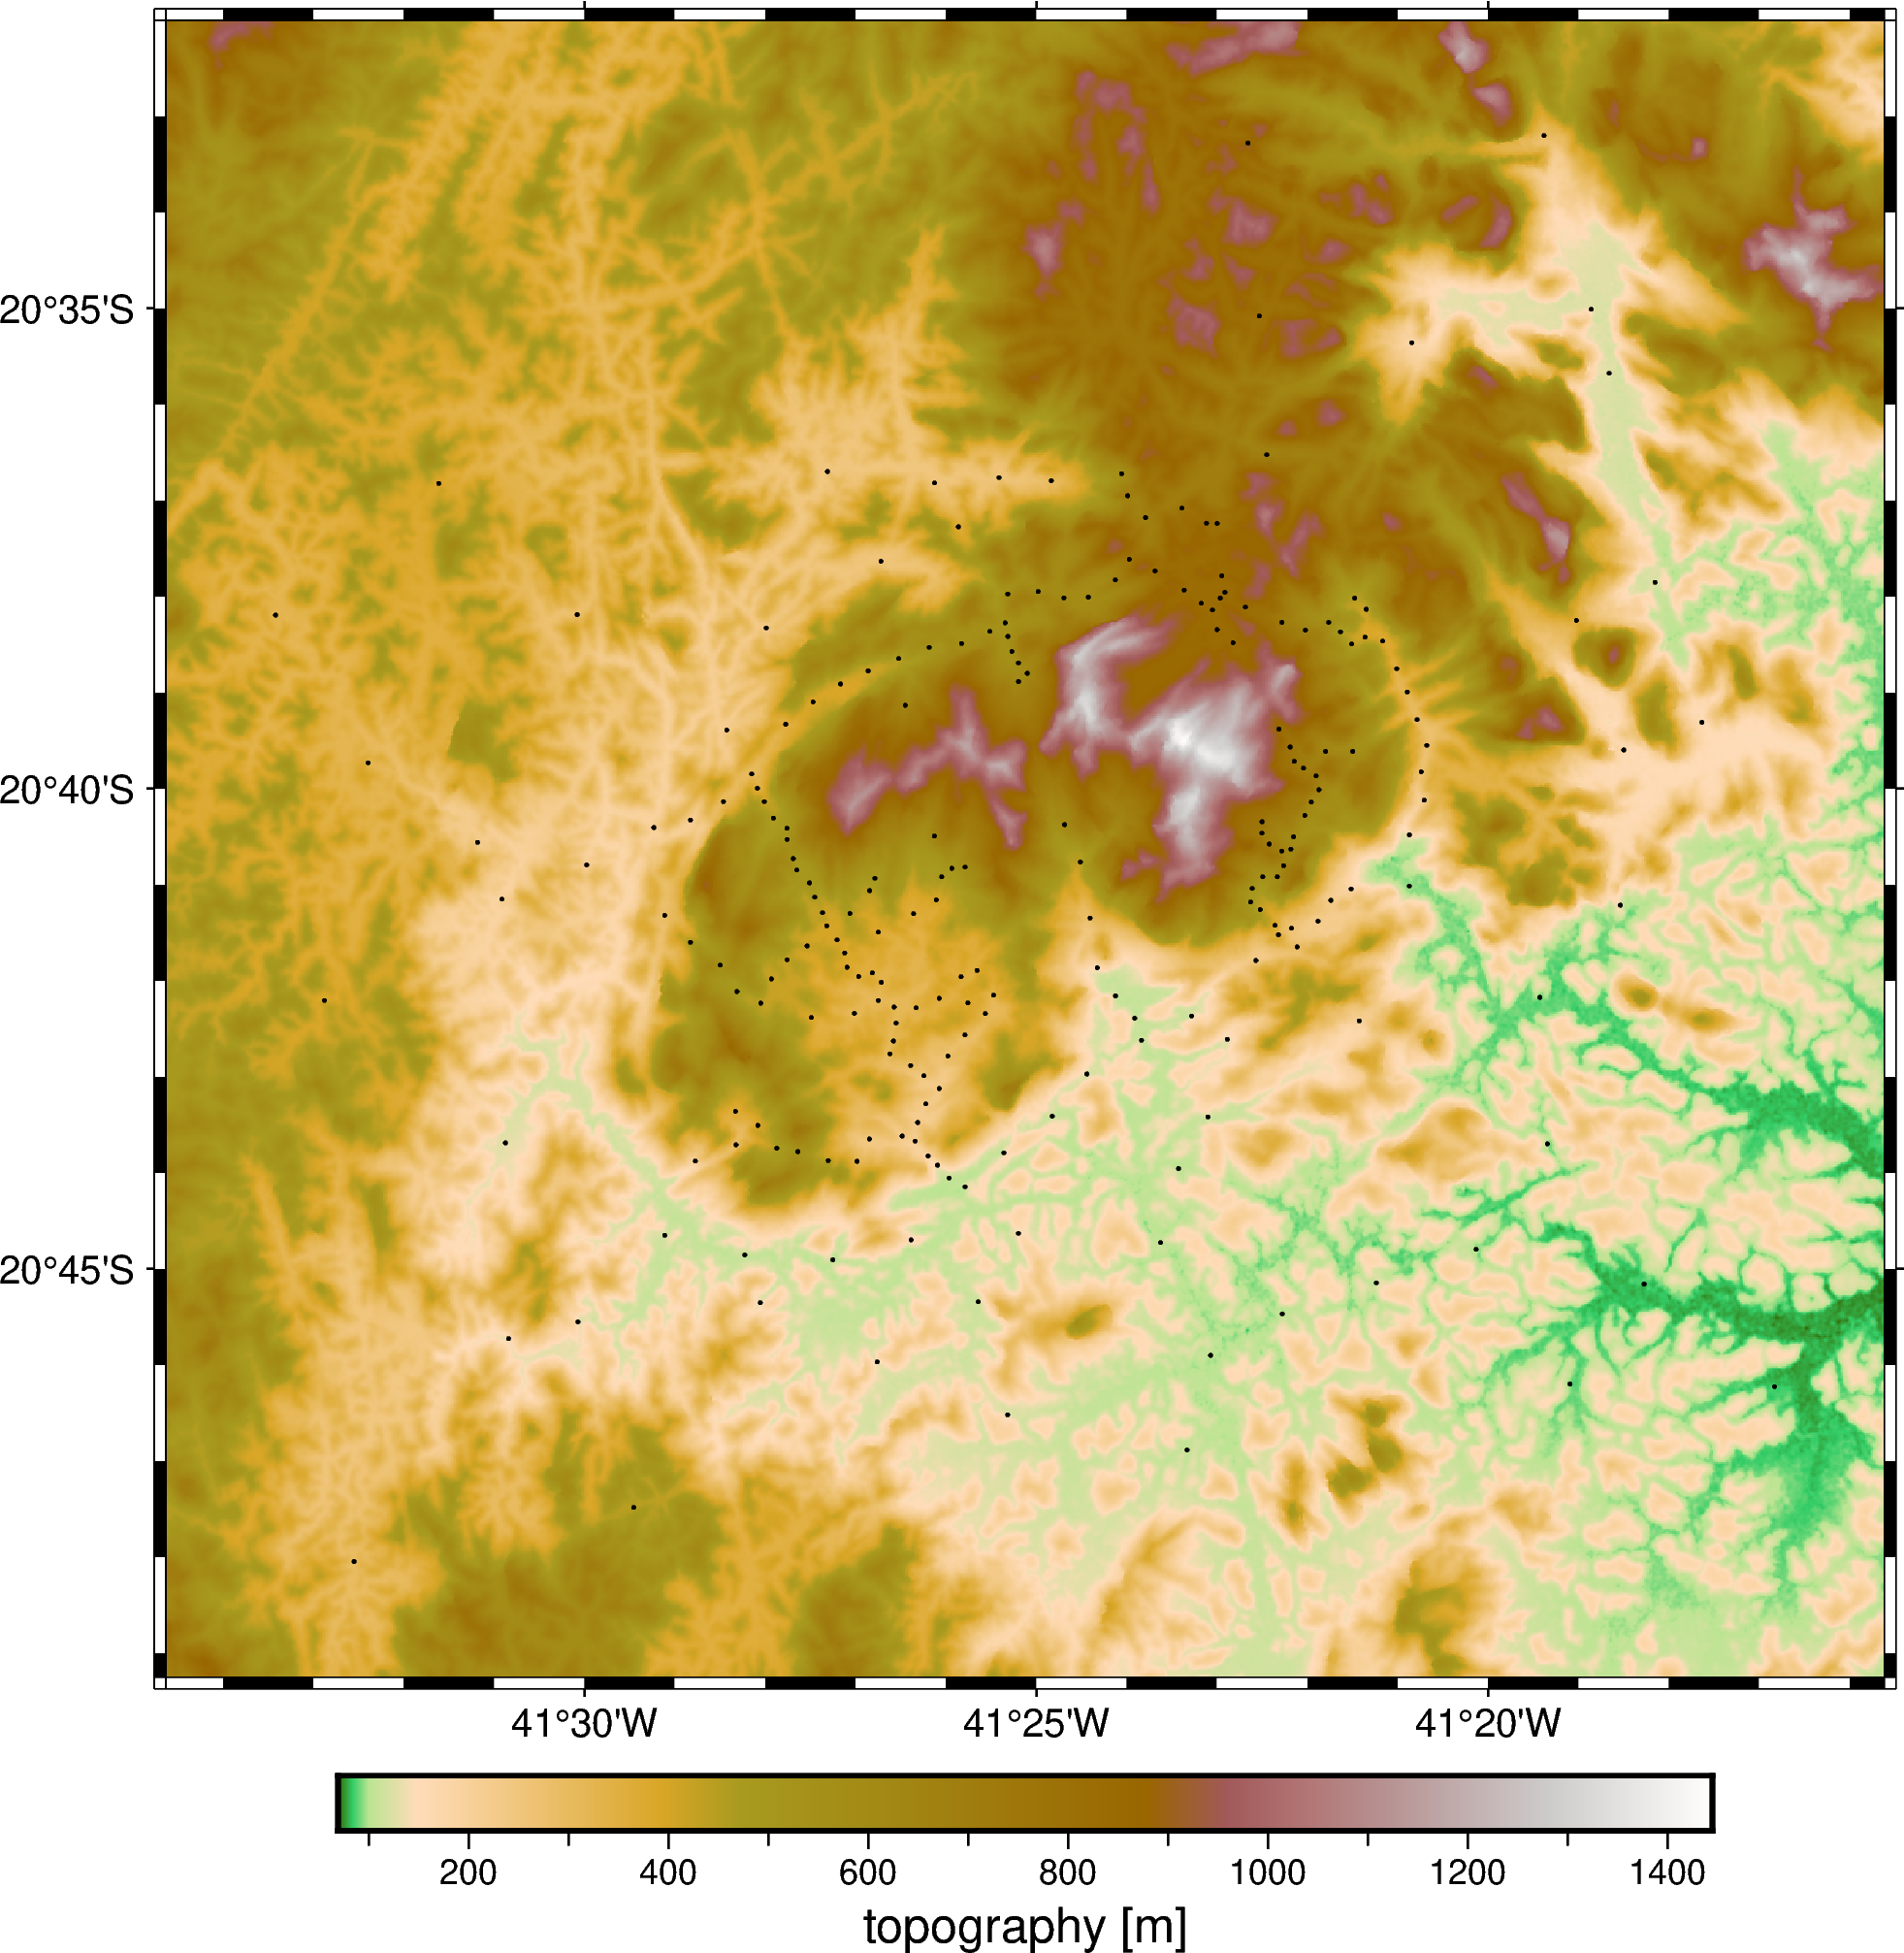

In [13]:
fig = pygmt.Figure()
fig.grdimage(topography, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.04c",
    color="black",
)
fig.show(width=600)

## Converte altitudes ortométricas para geométricas

In [14]:
topography_geometric = topography + geoid
topography_geometric

<xarray.DataArray (latitude: 1035, longitude: 1140)>
array([[676.4, 684.4, 690.4, ...,  99.7, 100.7, 106.7],
       [680.4, 691.4, 696.4, ..., 100.7, 101.7, 108.7],
       [683.4, 691.4, 701.4, ...,  99.7, 101.7, 107.7],
       ...,
       [814.4, 800.4, 789.4, ..., 272.7, 274.7, 274.7],
       [821.4, 810.4, 800.4, ..., 273.7, 276.7, 279.7],
       [824.4, 815.4, 806.4, ..., 281.7, 287.7, 294.7]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.53 -20.53 -20.53

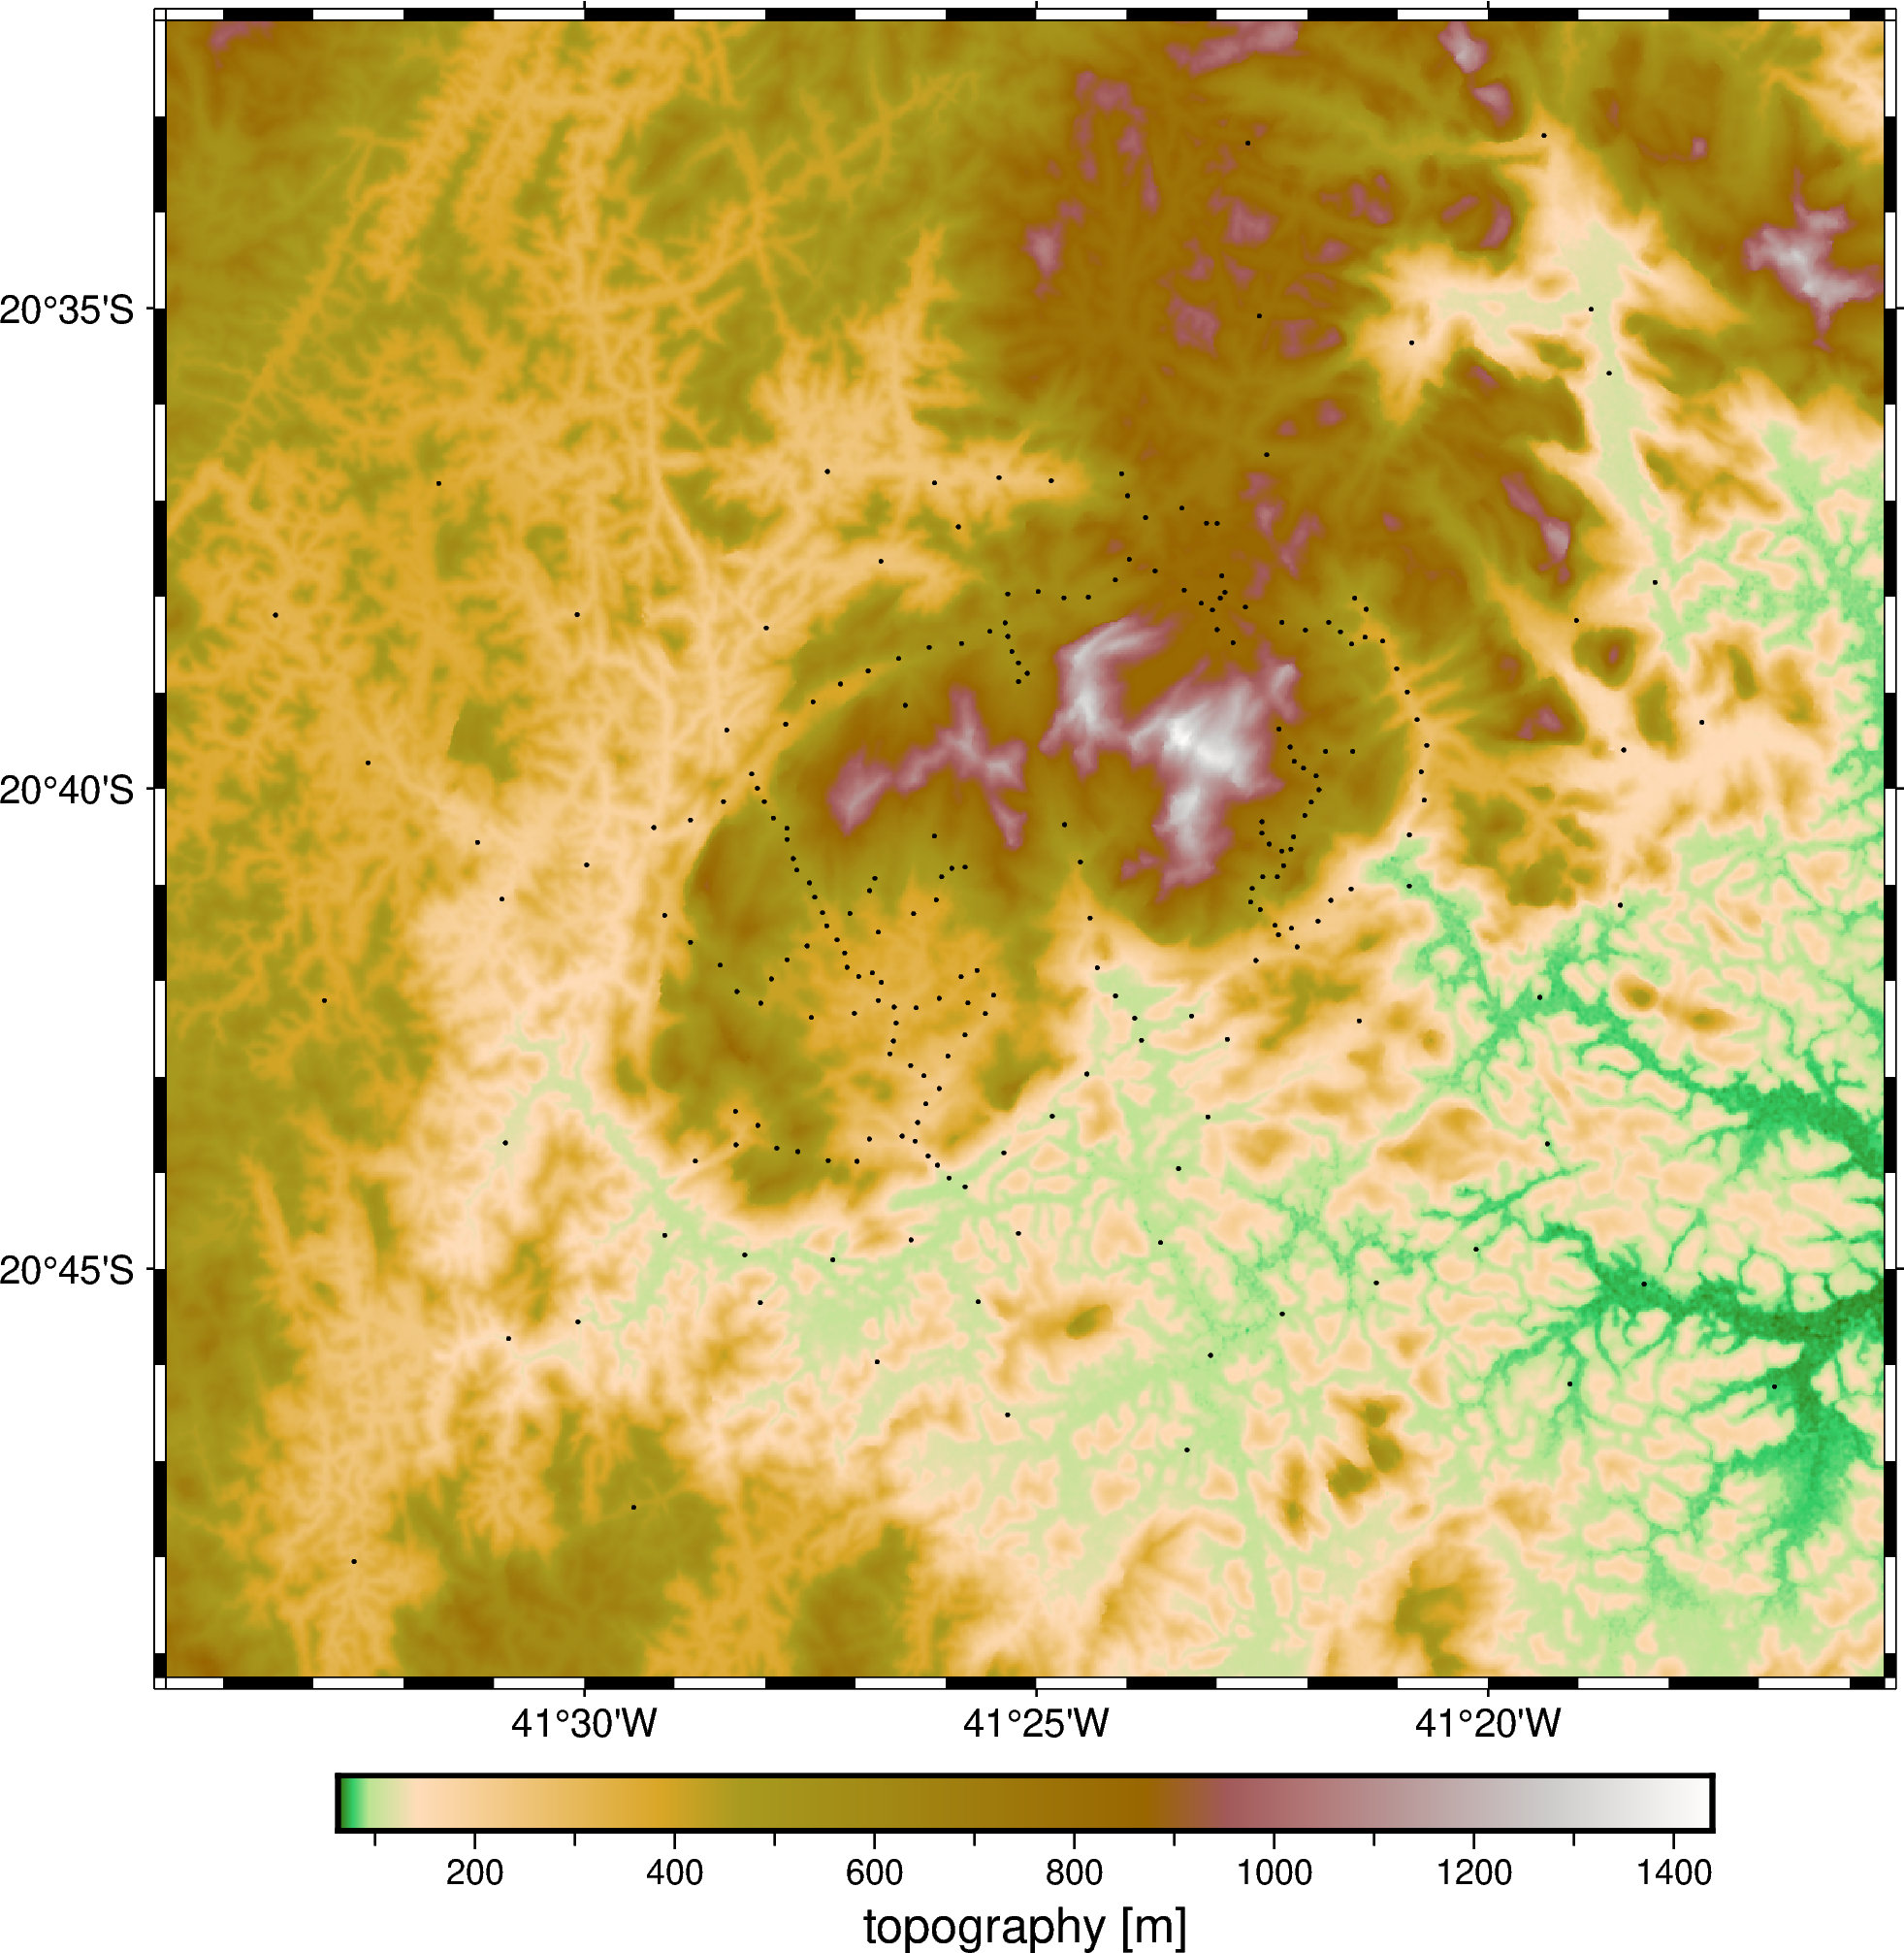

In [15]:
fig = pygmt.Figure()
fig.grdimage(topography_geometric, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.04c",
    color="black",
)
fig.show(width=600)

In [16]:
geoid_table = vd.grid_to_table(geoid)
interpolator = vd.KNeighbors()
interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.scalars)
data = data.assign(geoid_m=interpolator.predict((data.longitude, data.latitude)))
data = data.assign(height_geometric_m=data.height_sea_level_m + data.geoid_m)
# data
# geoid_table

## Distúrbio da gravidade

In [17]:
data = data.assign(
    normal_gravity_mgal=bl.WGS84.normal_gravity(data.latitude, data.height_geometric_m)
)
data = data.assign(gravity_disturbance_mgal=data.gravity_mgal - data.normal_gravity_mgal)
data

Station     Reading      Time        Date  height_sea_level_m  \
0          1     2239.39  14:28:00  2019/12/03              147.94   
1          2     2239.41  15:12:00  2019/12/03              152.06   
2          3     2246.38  16:06:00  2019/12/03              117.30   
3          4     2245.71  16:46:00  2019/12/03              129.10   
4          5     2249.62  17:13:00  2019/12/03              130.01   
..       ...         ...       ...         ...                 ...   
222      223  2203015.00  17:06:00  2019/12/16              264.94   
223      224  2168435.00  09:38:00  2019/12/17              204.11   
224      225     2164.15  11:52:00  2019/12/17              226.73   
225      226  2135695.00  15:49:00  2019/12/17              443.57   
226      227     2165.48  16:38:00  2019/12/17              293.06   

                 X             Y  longitude   latitude   gravity_mgal  \
0    238246.104213  7.702141e+06 -41.514018 -20.762135  978591.406605   
1    239573.565307  7.702483e+06 -41.501226 -20.759230  978591.445776   
2    241216.748955  7.704176e+06 -41.485206 -20.744179  978598.473518   
3    243071.287960  7.702906e+06 -41.467595 -20.755897  978597.809879   
4    245332.547009  7.701803e+06 -41.446052 -20.766168  978601.745635   
..             ...           ...        ...        ...            ...   
222  245174.133206  7.717189e+06 -41.445344 -20.627243  978555.178643   
223  239604.189758  7.711266e+06 -41.499631 -20.679943  978573.732084   
224  237502.245723  7.711667e+06 -41.519734 -20.676036  978569.446411   
225  240697.890125  7.698939e+06 -41.490961 -20.791377  978540.768876   
226  235344.656608  7.697817e+06 -41.542518 -20.800757  978570.866953   

     TideCorr        Source  geoid_m  height_geometric_m  normal_gravity_mgal  \
0    0.053423  03122019_996     -5.6              142.34        978637.755893   
1    0.066119  03122019_996     -5.6              146.46        978636.310346   
2    0.077715  03122019_996     -5.6              111.70        978646.141191   
3    0.081974  03122019_996     -5.6              123.50        978643.198869   
4    0.082319  03122019_996     -5.6              124.41        978643.532181   
..        ...           ...      ...                 ...                  ...   
222  0.096166  16122019_996     -5.6              259.34        978593.592668   
223 -0.030230  17122019_965     -5.6              198.51        978615.508625   
224  0.024382  17122019_965     -5.6              221.13        978608.293091   
225  0.125092  17122019_965     -5.6              437.97        978548.250028   
226  0.119784  17122019_965     -5.6              287.46        978595.269947   

     gravity_disturbance_mgal  
0                  -46.349288  
1                  -44.864570  
2                  -47.667672  
3                  -45.388990  
4                  -41.786546  
..                        ...  
222                -38.414026  
223                -41.776541  
224                -38.846680  
225                 -7.481152  
226                -24.402994  

[227 rows x 16 columns]

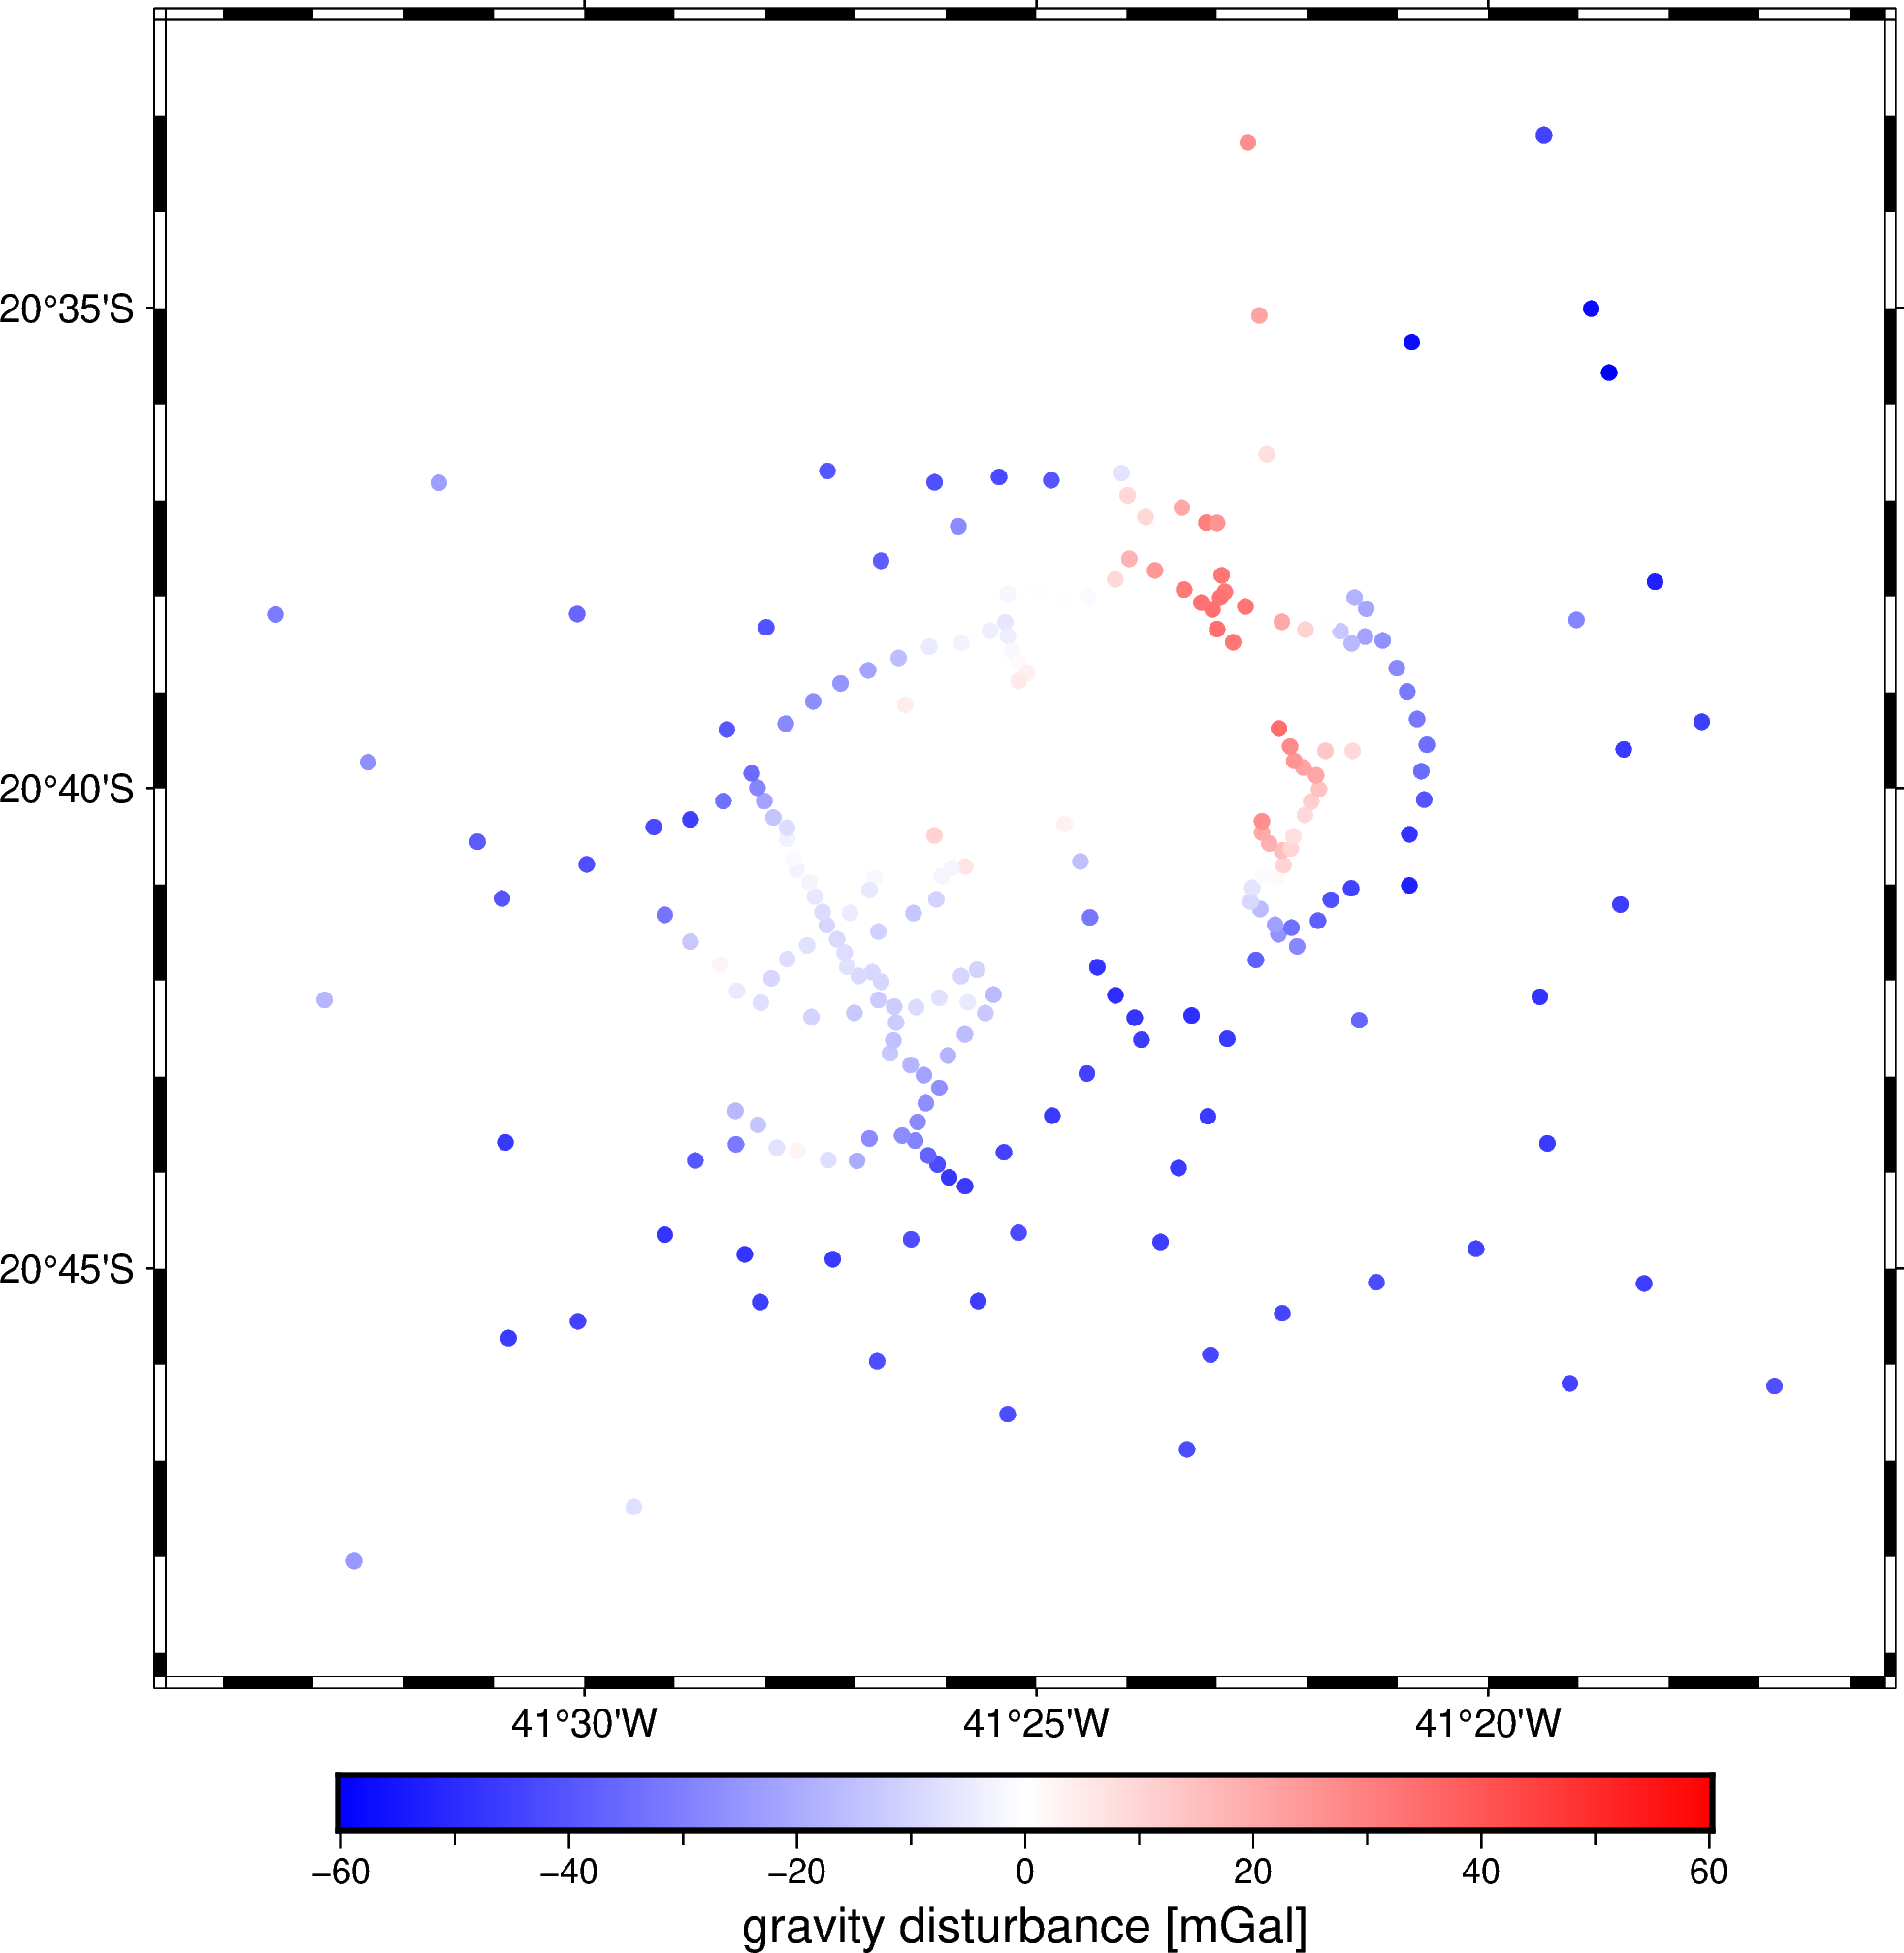

In [18]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_disturbance_mgal)
pygmt.makecpt(cmap="polar+h", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_disturbance_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="af",
)
fig.colorbar(frame='af+l"gravity disturbance [mGal]"')
fig.show(width=600)

## Correção topográfica

![](https://www.fatiando.org/tutorials/_images/topographic-correction.svg)

In [19]:
# projection = pyproj.Proj(proj="merc", lat_ts=data.latitude.mean())
projection = pyproj.Proj(proj='utm', ellps='WGS84', zone=24, south=True)

In [20]:
easting, northing = projection(data.longitude.values, data.latitude.values)
data = data.assign(easting_m=easting, northing_m=northing)
data

Station     Reading      Time        Date  height_sea_level_m  \
0          1     2239.39  14:28:00  2019/12/03              147.94   
1          2     2239.41  15:12:00  2019/12/03              152.06   
2          3     2246.38  16:06:00  2019/12/03              117.30   
3          4     2245.71  16:46:00  2019/12/03              129.10   
4          5     2249.62  17:13:00  2019/12/03              130.01   
..       ...         ...       ...         ...                 ...   
222      223  2203015.00  17:06:00  2019/12/16              264.94   
223      224  2168435.00  09:38:00  2019/12/17              204.11   
224      225     2164.15  11:52:00  2019/12/17              226.73   
225      226  2135695.00  15:49:00  2019/12/17              443.57   
226      227     2165.48  16:38:00  2019/12/17              293.06   

                 X             Y  longitude   latitude   gravity_mgal  \
0    238246.104213  7.702141e+06 -41.514018 -20.762135  978591.406605   
1    239573.565307  7.702483e+06 -41.501226 -20.759230  978591.445776   
2    241216.748955  7.704176e+06 -41.485206 -20.744179  978598.473518   
3    243071.287960  7.702906e+06 -41.467595 -20.755897  978597.809879   
4    245332.547009  7.701803e+06 -41.446052 -20.766168  978601.745635   
..             ...           ...        ...        ...            ...   
222  245174.133206  7.717189e+06 -41.445344 -20.627243  978555.178643   
223  239604.189758  7.711266e+06 -41.499631 -20.679943  978573.732084   
224  237502.245723  7.711667e+06 -41.519734 -20.676036  978569.446411   
225  240697.890125  7.698939e+06 -41.490961 -20.791377  978540.768876   
226  235344.656608  7.697817e+06 -41.542518 -20.800757  978570.866953   

     TideCorr        Source  geoid_m  height_geometric_m  normal_gravity_mgal  \
0    0.053423  03122019_996     -5.6              142.34        978637.755893   
1    0.066119  03122019_996     -5.6              146.46        978636.310346   
2    0.077715  03122019_996     -5.6              111.70        978646.141191   
3    0.081974  03122019_996     -5.6              123.50        978643.198869   
4    0.082319  03122019_996     -5.6              124.41        978643.532181   
..        ...           ...      ...                 ...                  ...   
222  0.096166  16122019_996     -5.6              259.34        978593.592668   
223 -0.030230  17122019_965     -5.6              198.51        978615.508625   
224  0.024382  17122019_965     -5.6              221.13        978608.293091   
225  0.125092  17122019_965     -5.6              437.97        978548.250028   
226  0.119784  17122019_965     -5.6              287.46        978595.269947   

     gravity_disturbance_mgal      easting_m    northing_m  
0                  -46.349288  238246.104213  7.702141e+06  
1                  -44.864570  239573.565308  7.702483e+06  
2                  -47.667672  241216.748956  7.704176e+06  
3                  -45.388990  243071.287960  7.702906e+06  
4                  -41.786546  245332.547009  7.701803e+06  
..                        ...            ...           ...  
222                -38.414026  245174.133206  7.717189e+06  
223                -41.776541  239604.189759  7.711266e+06  
224                -38.846680  237502.245723  7.711667e+06  
225                 -7.481152  240697.890126  7.698939e+06  
226                -24.402994  235344.656609  7.697817e+06  

[227 rows x 18 columns]

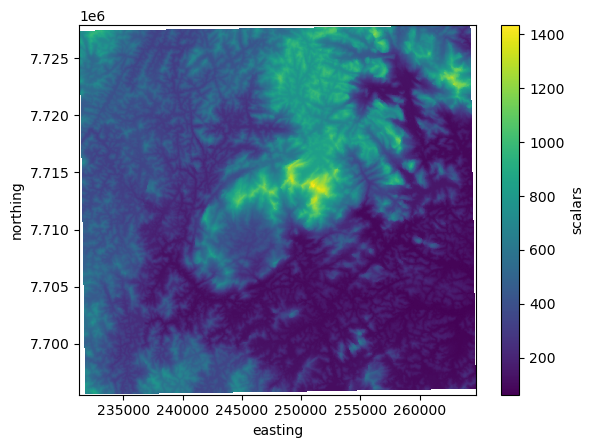

In [21]:
topography_proj = vd.project_grid(topography_geometric, projection, method="nearest")

# topography_proj.values = topography_geometric.values

topography_proj.plot()

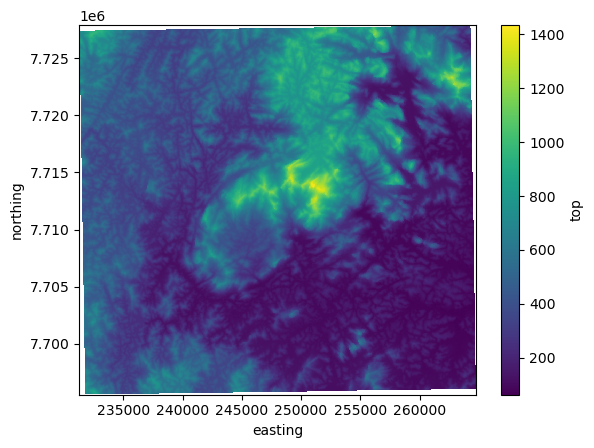

In [22]:
topography_density = np.where(topography_proj > 0, 2670, 1040 - 2670)
topography_model = hm.prism_layer(
    coordinates=(topography_proj.easting, topography_proj.northing),
    surface=topography_proj,
    reference=0,
    properties={"density": topography_density}
)

topography_model.top.plot()

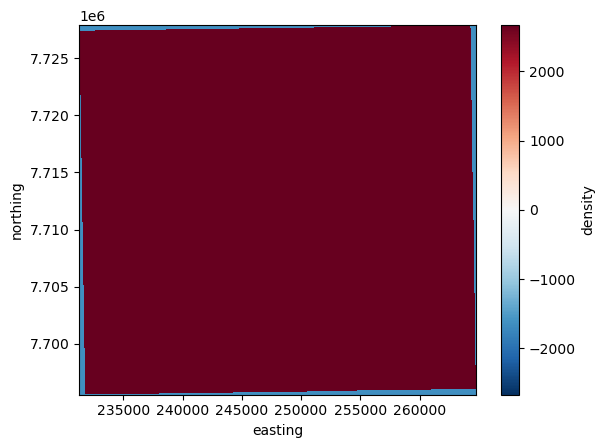

In [23]:
# fig = pygmt.Figure()
# scale = vd.maxabs(topography_model.density)
# pygmt.makecpt(cmap="roma+h", reverse=True, series=[-scale, scale])
# fig.grdimage(topography_model.density, projection="X15c/15c", frame=True)
# fig.colorbar(frame='af+l"Density of the prism model [kg/m3]"')
# fig.show()

topography_model.density.plot()

In [24]:
coordinates = (data.easting_m, data.northing_m, data.height_geometric_m)
terrain_effect = topography_model.prism_layer.gravity(coordinates, field="g_z")

In [25]:
data = data.assign(
    gravity_bouguer_mgal=data.gravity_disturbance_mgal - terrain_effect
)
data

Station     Reading      Time        Date  height_sea_level_m  \
0          1     2239.39  14:28:00  2019/12/03              147.94   
1          2     2239.41  15:12:00  2019/12/03              152.06   
2          3     2246.38  16:06:00  2019/12/03              117.30   
3          4     2245.71  16:46:00  2019/12/03              129.10   
4          5     2249.62  17:13:00  2019/12/03              130.01   
..       ...         ...       ...         ...                 ...   
222      223  2203015.00  17:06:00  2019/12/16              264.94   
223      224  2168435.00  09:38:00  2019/12/17              204.11   
224      225     2164.15  11:52:00  2019/12/17              226.73   
225      226  2135695.00  15:49:00  2019/12/17              443.57   
226      227     2165.48  16:38:00  2019/12/17              293.06   

                 X             Y  longitude   latitude   gravity_mgal  \
0    238246.104213  7.702141e+06 -41.514018 -20.762135  978591.406605   
1    239573.565307  7.702483e+06 -41.501226 -20.759230  978591.445776   
2    241216.748955  7.704176e+06 -41.485206 -20.744179  978598.473518   
3    243071.287960  7.702906e+06 -41.467595 -20.755897  978597.809879   
4    245332.547009  7.701803e+06 -41.446052 -20.766168  978601.745635   
..             ...           ...        ...        ...            ...   
222  245174.133206  7.717189e+06 -41.445344 -20.627243  978555.178643   
223  239604.189758  7.711266e+06 -41.499631 -20.679943  978573.732084   
224  237502.245723  7.711667e+06 -41.519734 -20.676036  978569.446411   
225  240697.890125  7.698939e+06 -41.490961 -20.791377  978540.768876   
226  235344.656608  7.697817e+06 -41.542518 -20.800757  978570.866953   

     TideCorr        Source  geoid_m  height_geometric_m  normal_gravity_mgal  \
0    0.053423  03122019_996     -5.6              142.34        978637.755893   
1    0.066119  03122019_996     -5.6              146.46        978636.310346   
2    0.077715  03122019_996     -5.6              111.70        978646.141191   
3    0.081974  03122019_996     -5.6              123.50        978643.198869   
4    0.082319  03122019_996     -5.6              124.41        978643.532181   
..        ...           ...      ...                 ...                  ...   
222  0.096166  16122019_996     -5.6              259.34        978593.592668   
223 -0.030230  17122019_965     -5.6              198.51        978615.508625   
224  0.024382  17122019_965     -5.6              221.13        978608.293091   
225  0.125092  17122019_965     -5.6              437.97        978548.250028   
226  0.119784  17122019_965     -5.6              287.46        978595.269947   

     gravity_disturbance_mgal      easting_m    northing_m  \
0                  -46.349288  238246.104213  7.702141e+06   
1                  -44.864570  239573.565308  7.702483e+06   
2                  -47.667672  241216.748956  7.704176e+06   
3                  -45.388990  243071.287960  7.702906e+06   
4                  -41.786546  245332.547009  7.701803e+06   
..                        ...            ...           ...   
222                -38.414026  245174.133206  7.717189e+06   
223                -41.776541  239604.189759  7.711266e+06   
224                -38.846680  237502.245723  7.711667e+06   
225                 -7.481152  240697.890126  7.698939e+06   
226                -24.402994  235344.656609  7.697817e+06   

     gravity_bouguer_mgal  
0              -57.329386  
1              -57.635391  
2              -58.102189  
3              -55.828249  
4              -53.301499  
..                    ...  
222            -61.985274  
223            -60.396328  
224            -60.471629  
225            -53.266179  
226            -53.688272  

[227 rows x 19 columns]

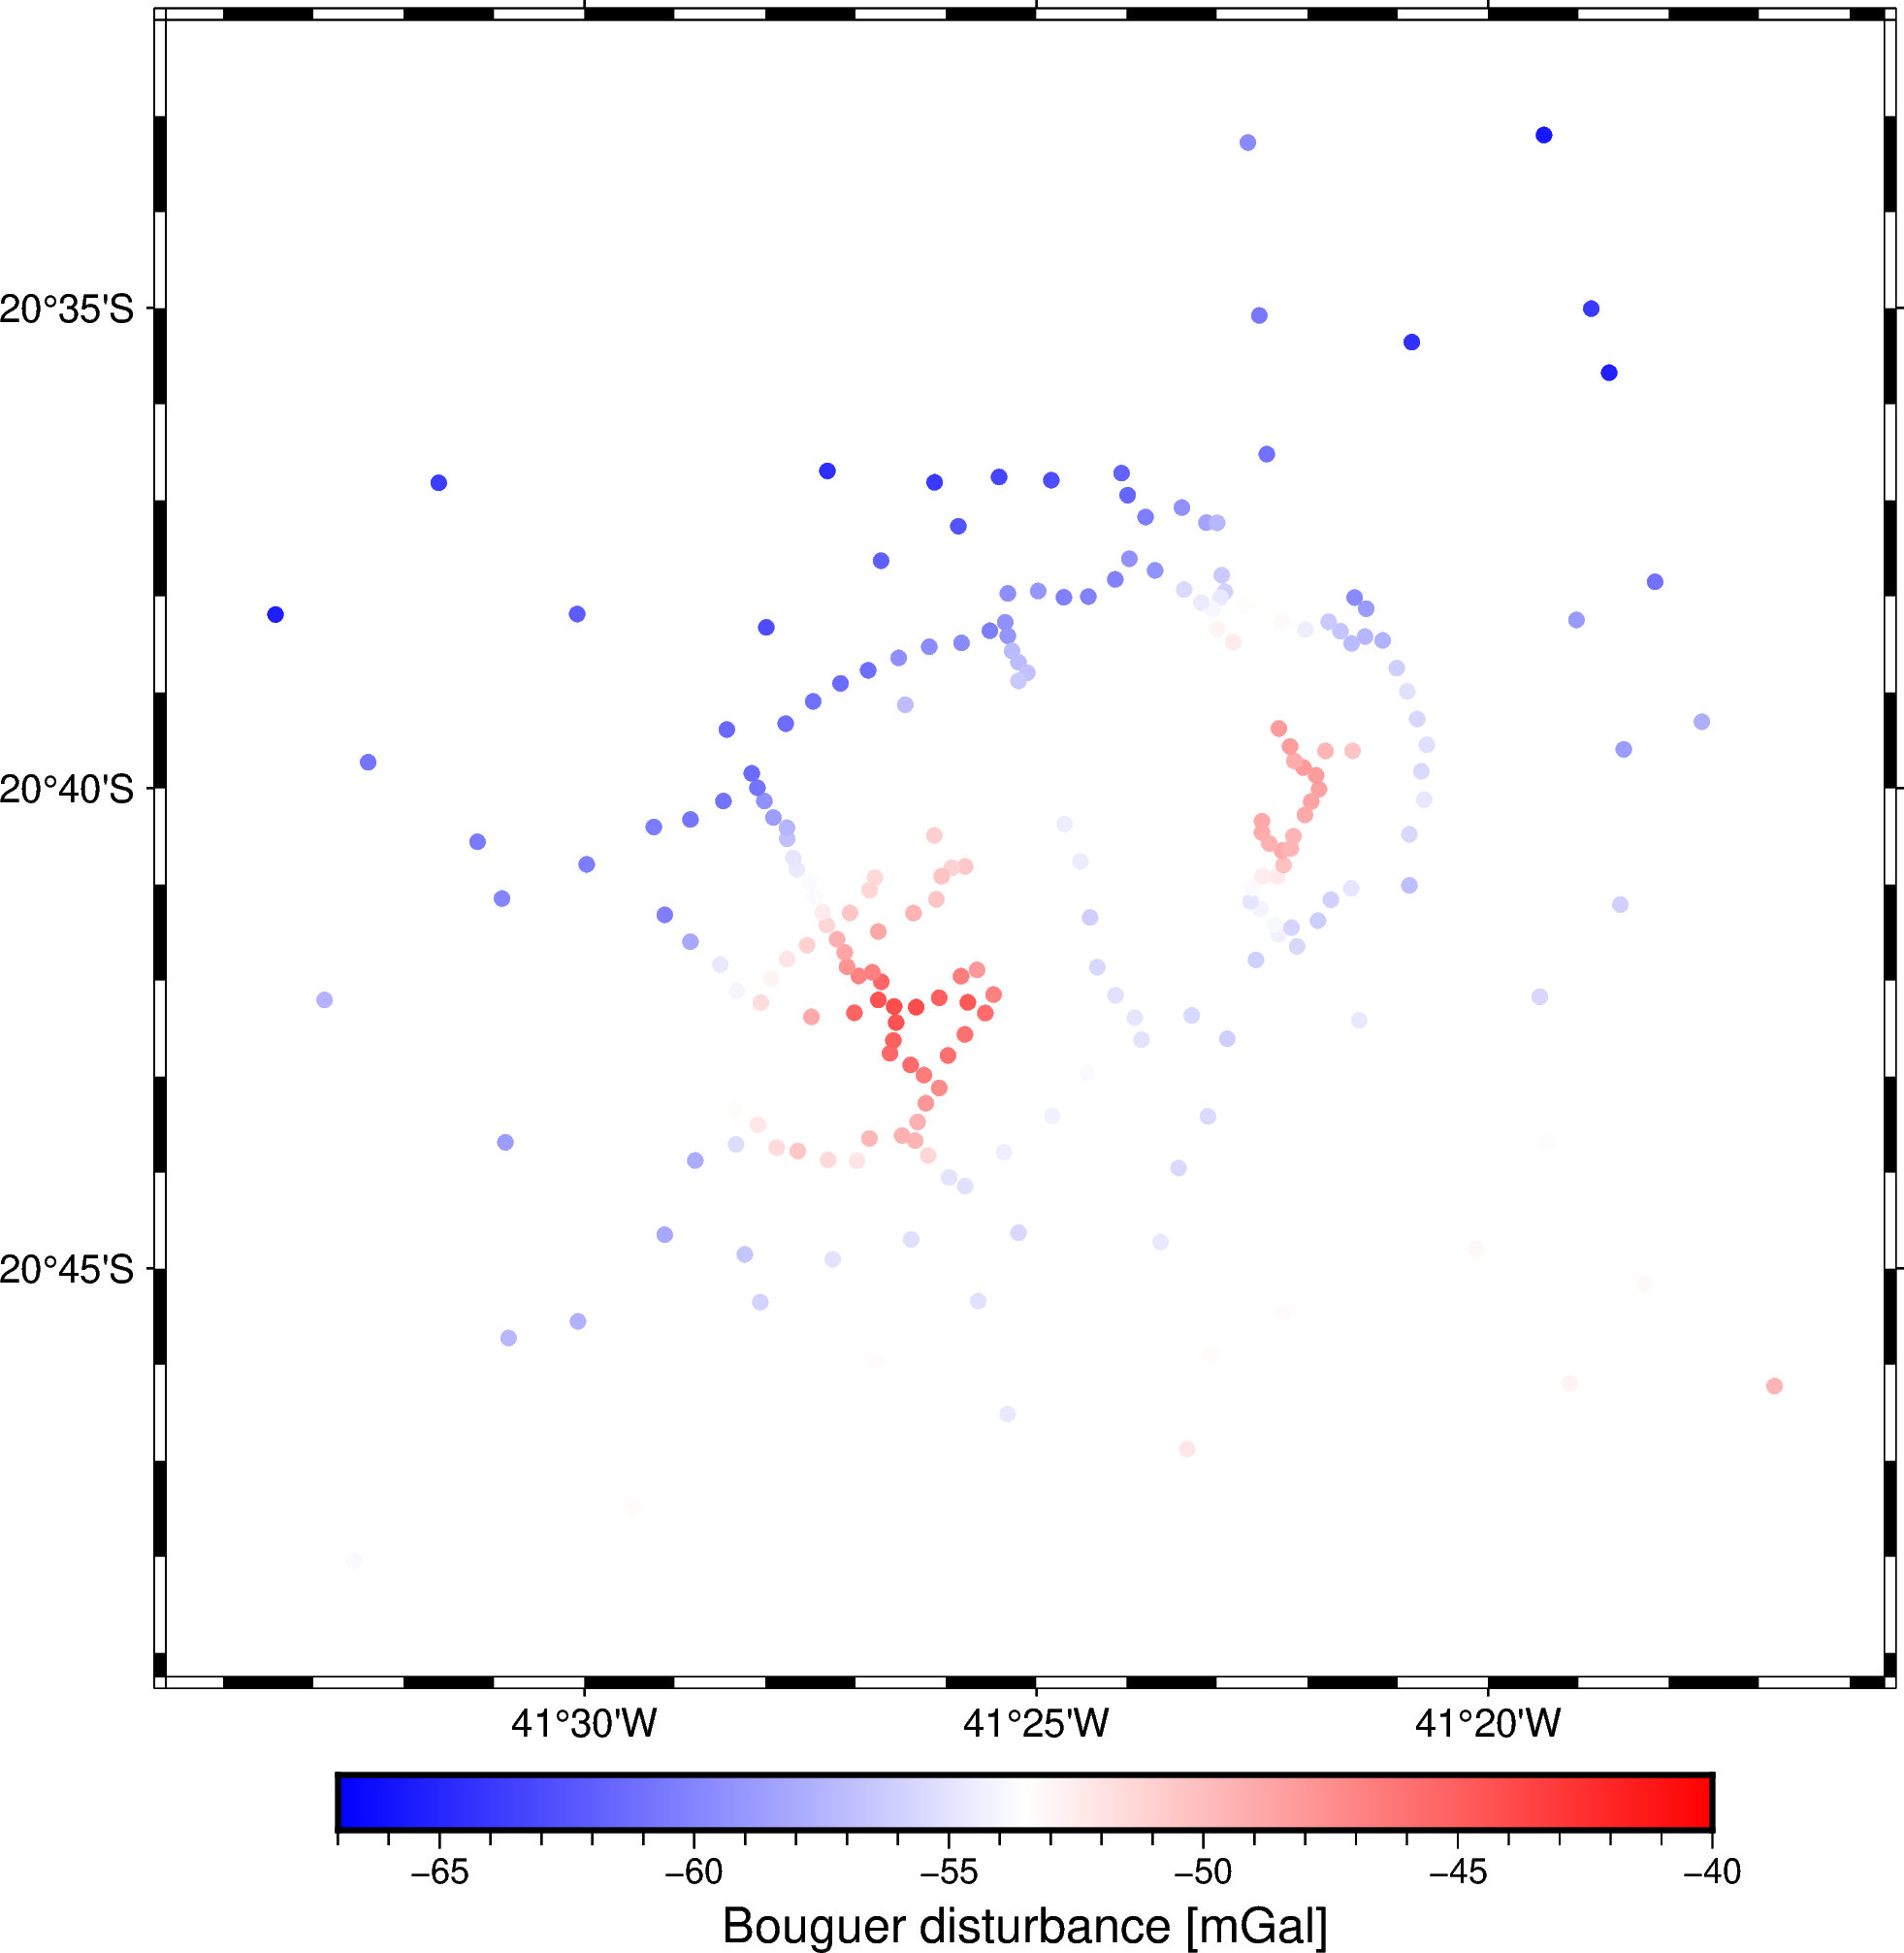

In [26]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_bouguer_mgal)
pygmt.makecpt(cmap="polar", series=[-67, -40])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_bouguer_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Bouguer disturbance [mGal]"')
fig.show()

## Separação regional residual

In [27]:
regional = vd.Trend(degree=1).fit(coordinates, data.gravity_bouguer_mgal)
data = data.assign(
    regional_mgal=regional.predict(coordinates),
)
data = data.assign(
    residual_mgal=data.gravity_bouguer_mgal - data.regional_mgal,
)
data

Station     Reading      Time        Date  height_sea_level_m  \
0          1     2239.39  14:28:00  2019/12/03              147.94   
1          2     2239.41  15:12:00  2019/12/03              152.06   
2          3     2246.38  16:06:00  2019/12/03              117.30   
3          4     2245.71  16:46:00  2019/12/03              129.10   
4          5     2249.62  17:13:00  2019/12/03              130.01   
..       ...         ...       ...         ...                 ...   
222      223  2203015.00  17:06:00  2019/12/16              264.94   
223      224  2168435.00  09:38:00  2019/12/17              204.11   
224      225     2164.15  11:52:00  2019/12/17              226.73   
225      226  2135695.00  15:49:00  2019/12/17              443.57   
226      227     2165.48  16:38:00  2019/12/17              293.06   

                 X             Y  longitude   latitude   gravity_mgal  ...  \
0    238246.104213  7.702141e+06 -41.514018 -20.762135  978591.406605  ...   
1    239573.565307  7.702483e+06 -41.501226 -20.759230  978591.445776  ...   
2    241216.748955  7.704176e+06 -41.485206 -20.744179  978598.473518  ...   
3    243071.287960  7.702906e+06 -41.467595 -20.755897  978597.809879  ...   
4    245332.547009  7.701803e+06 -41.446052 -20.766168  978601.745635  ...   
..             ...           ...        ...        ...            ...  ...   
222  245174.133206  7.717189e+06 -41.445344 -20.627243  978555.178643  ...   
223  239604.189758  7.711266e+06 -41.499631 -20.679943  978573.732084  ...   
224  237502.245723  7.711667e+06 -41.519734 -20.676036  978569.446411  ...   
225  240697.890125  7.698939e+06 -41.490961 -20.791377  978540.768876  ...   
226  235344.656608  7.697817e+06 -41.542518 -20.800757  978570.866953  ...   

           Source geoid_m  height_geometric_m  normal_gravity_mgal  \
0    03122019_996    -5.6              142.34        978637.755893   
1    03122019_996    -5.6              146.46        978636.310346   
2    03122019_996    -5.6              111.70        978646.141191   
3    03122019_996    -5.6              123.50        978643.198869   
4    03122019_996    -5.6              124.41        978643.532181   
..            ...     ...                 ...                  ...   
222  16122019_996    -5.6              259.34        978593.592668   
223  17122019_965    -5.6              198.51        978615.508625   
224  17122019_965    -5.6              221.13        978608.293091   
225  17122019_965    -5.6              437.97        978548.250028   
226  17122019_965    -5.6              287.46        978595.269947   

     gravity_disturbance_mgal      easting_m    northing_m  \
0                  -46.349288  238246.104213  7.702141e+06   
1                  -44.864570  239573.565308  7.702483e+06   
2                  -47.667672  241216.748956  7.704176e+06   
3                  -45.388990  243071.287960  7.702906e+06   
4                  -41.786546  245332.547009  7.701803e+06   
..                        ...            ...           ...   
222                -38.414026  245174.133206  7.717189e+06   
223                -41.776541  239604.189759  7.711266e+06   
224                -38.846680  237502.245723  7.711667e+06   
225                 -7.481152  240697.890126  7.698939e+06   
226                -24.402994  235344.656609  7.697817e+06   

     gravity_bouguer_mgal  regional_mgal  residual_mgal  
0              -57.329386     -51.183233      -6.146153  
1              -57.635391     -51.149240      -6.486151  
2              -58.102189     -51.835811      -6.266378  
3              -55.828249     -50.784632      -5.043617  
4              -53.301499     -49.758250      -3.543249  
..                    ...            ...            ...  
222            -61.985274     -58.621371      -3.363903  
223            -60.396328     -56.187897      -4.208431  
224            -60.471629     -56.782842      -3.688787  
225            -53.266179     -48.918974      -4.347205  
226

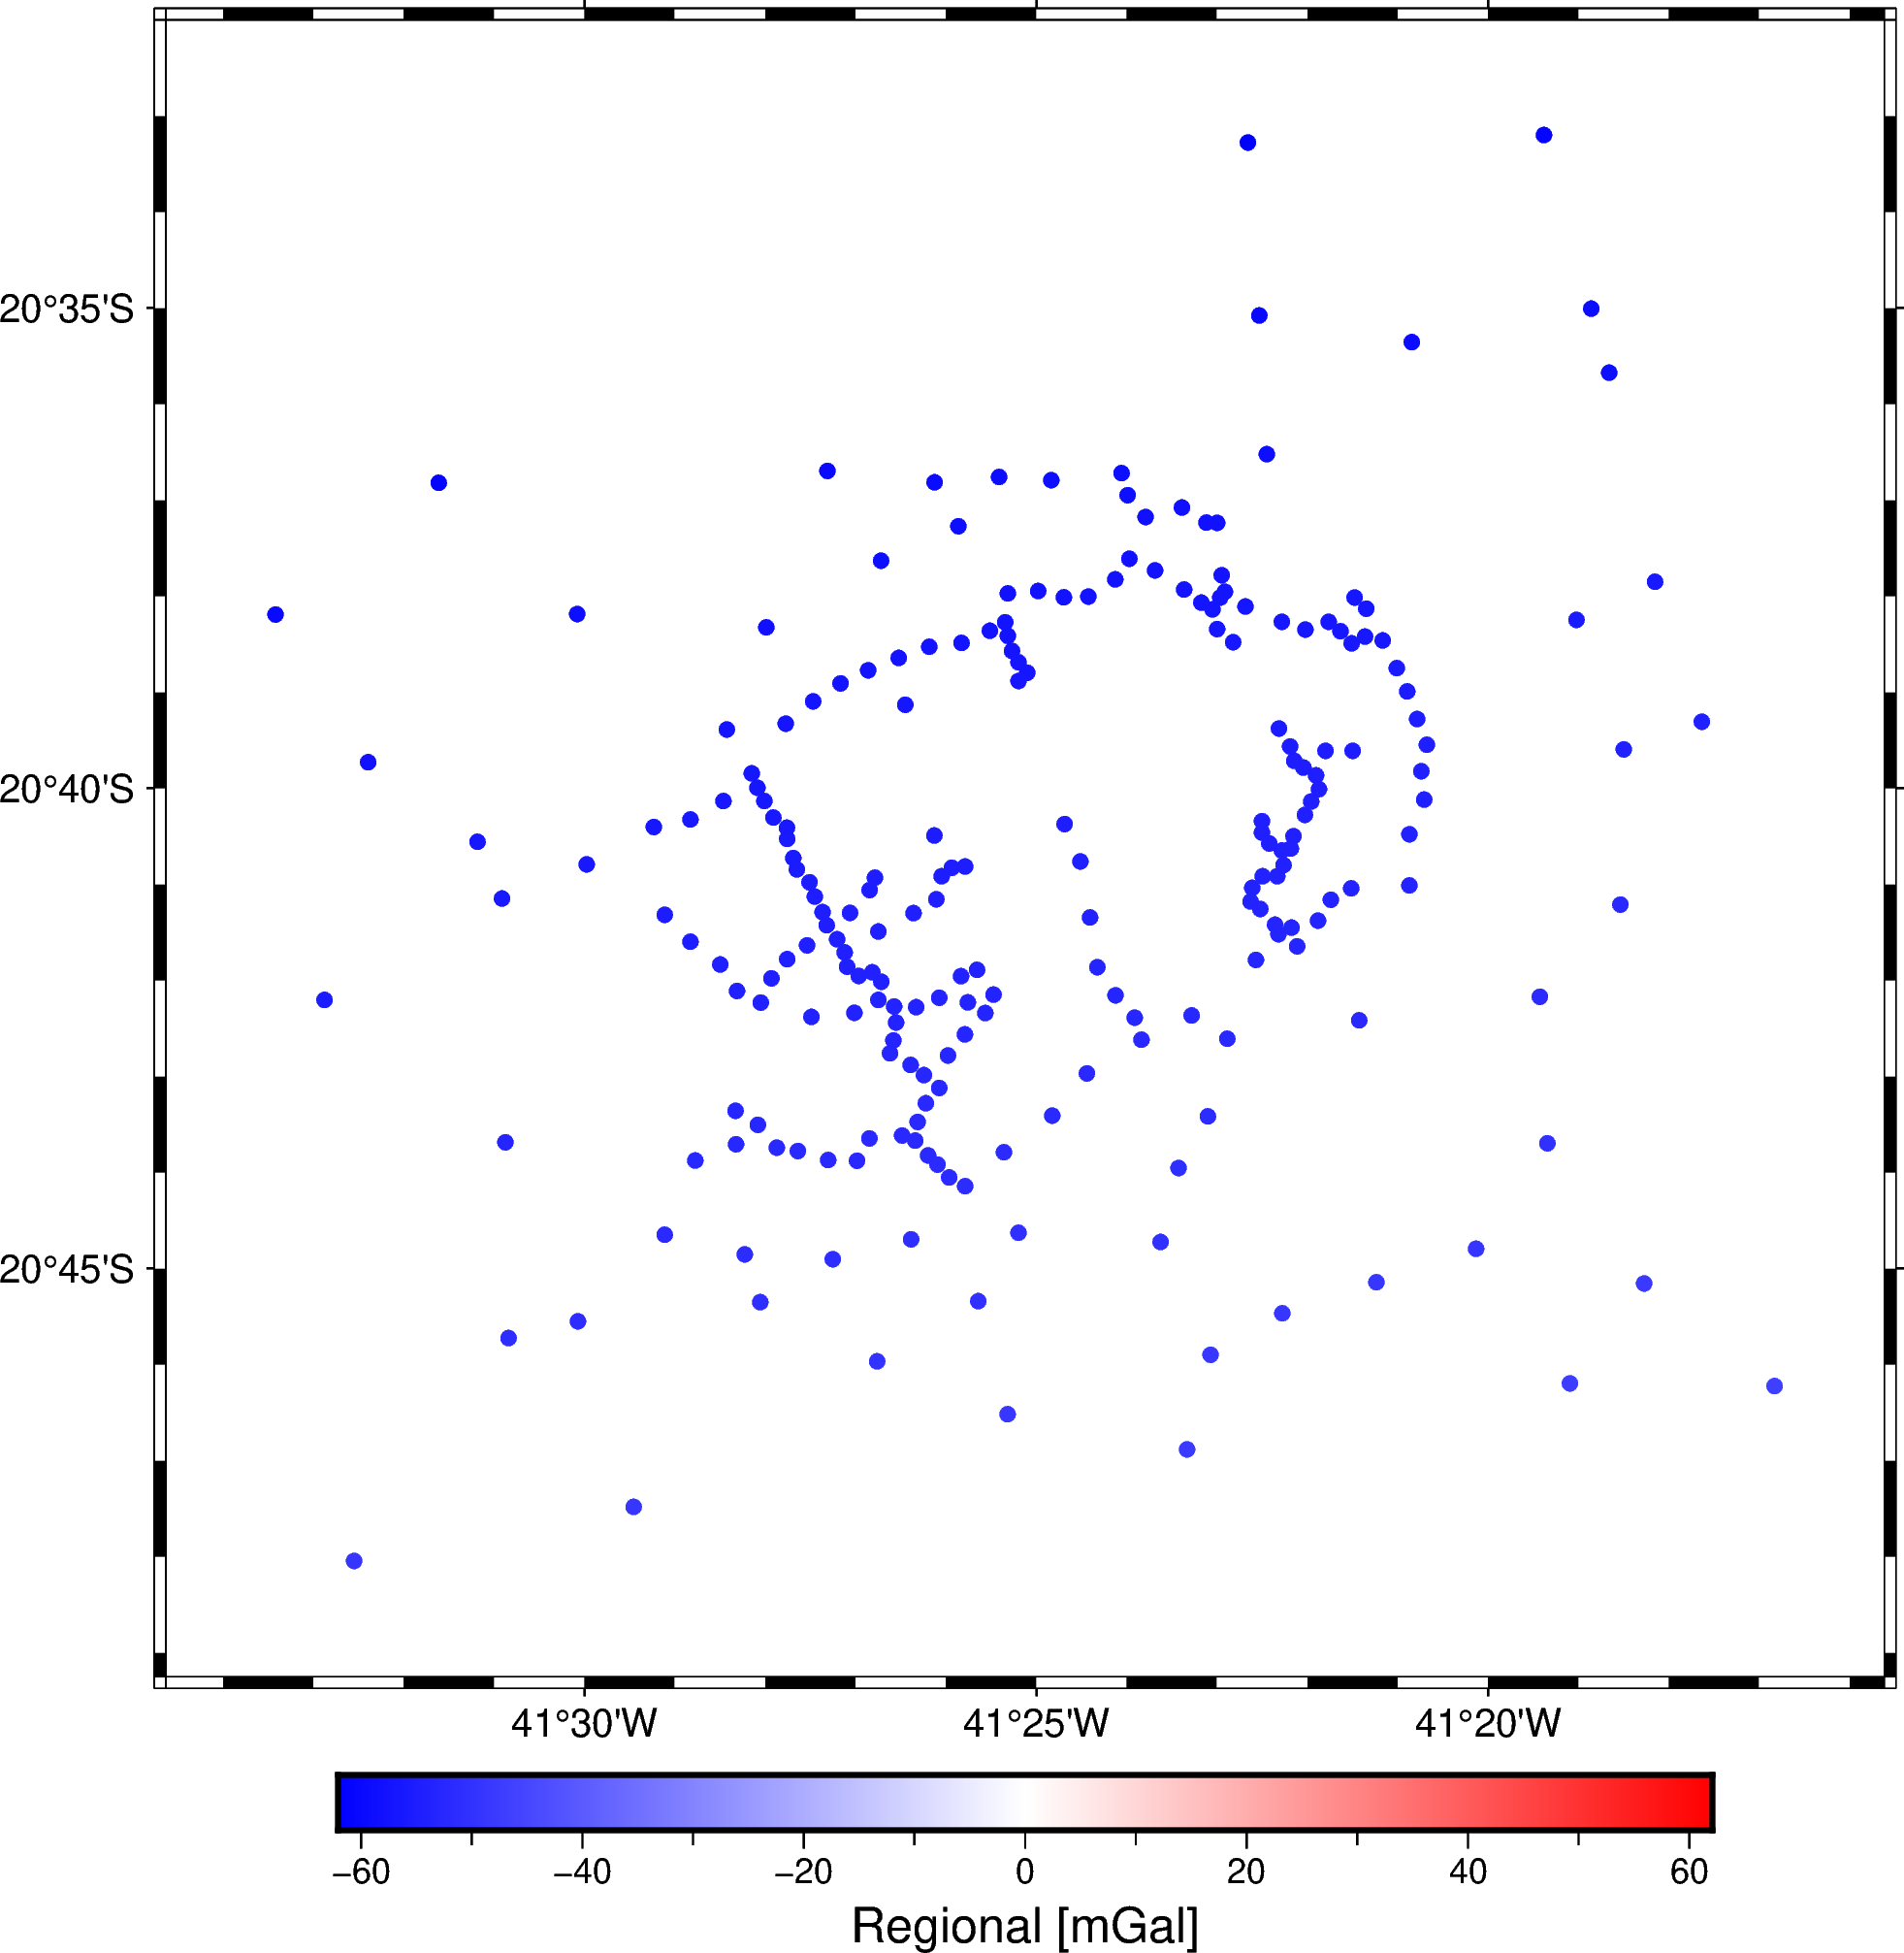

In [28]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.regional_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.regional_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Regional [mGal]"')
fig.show()

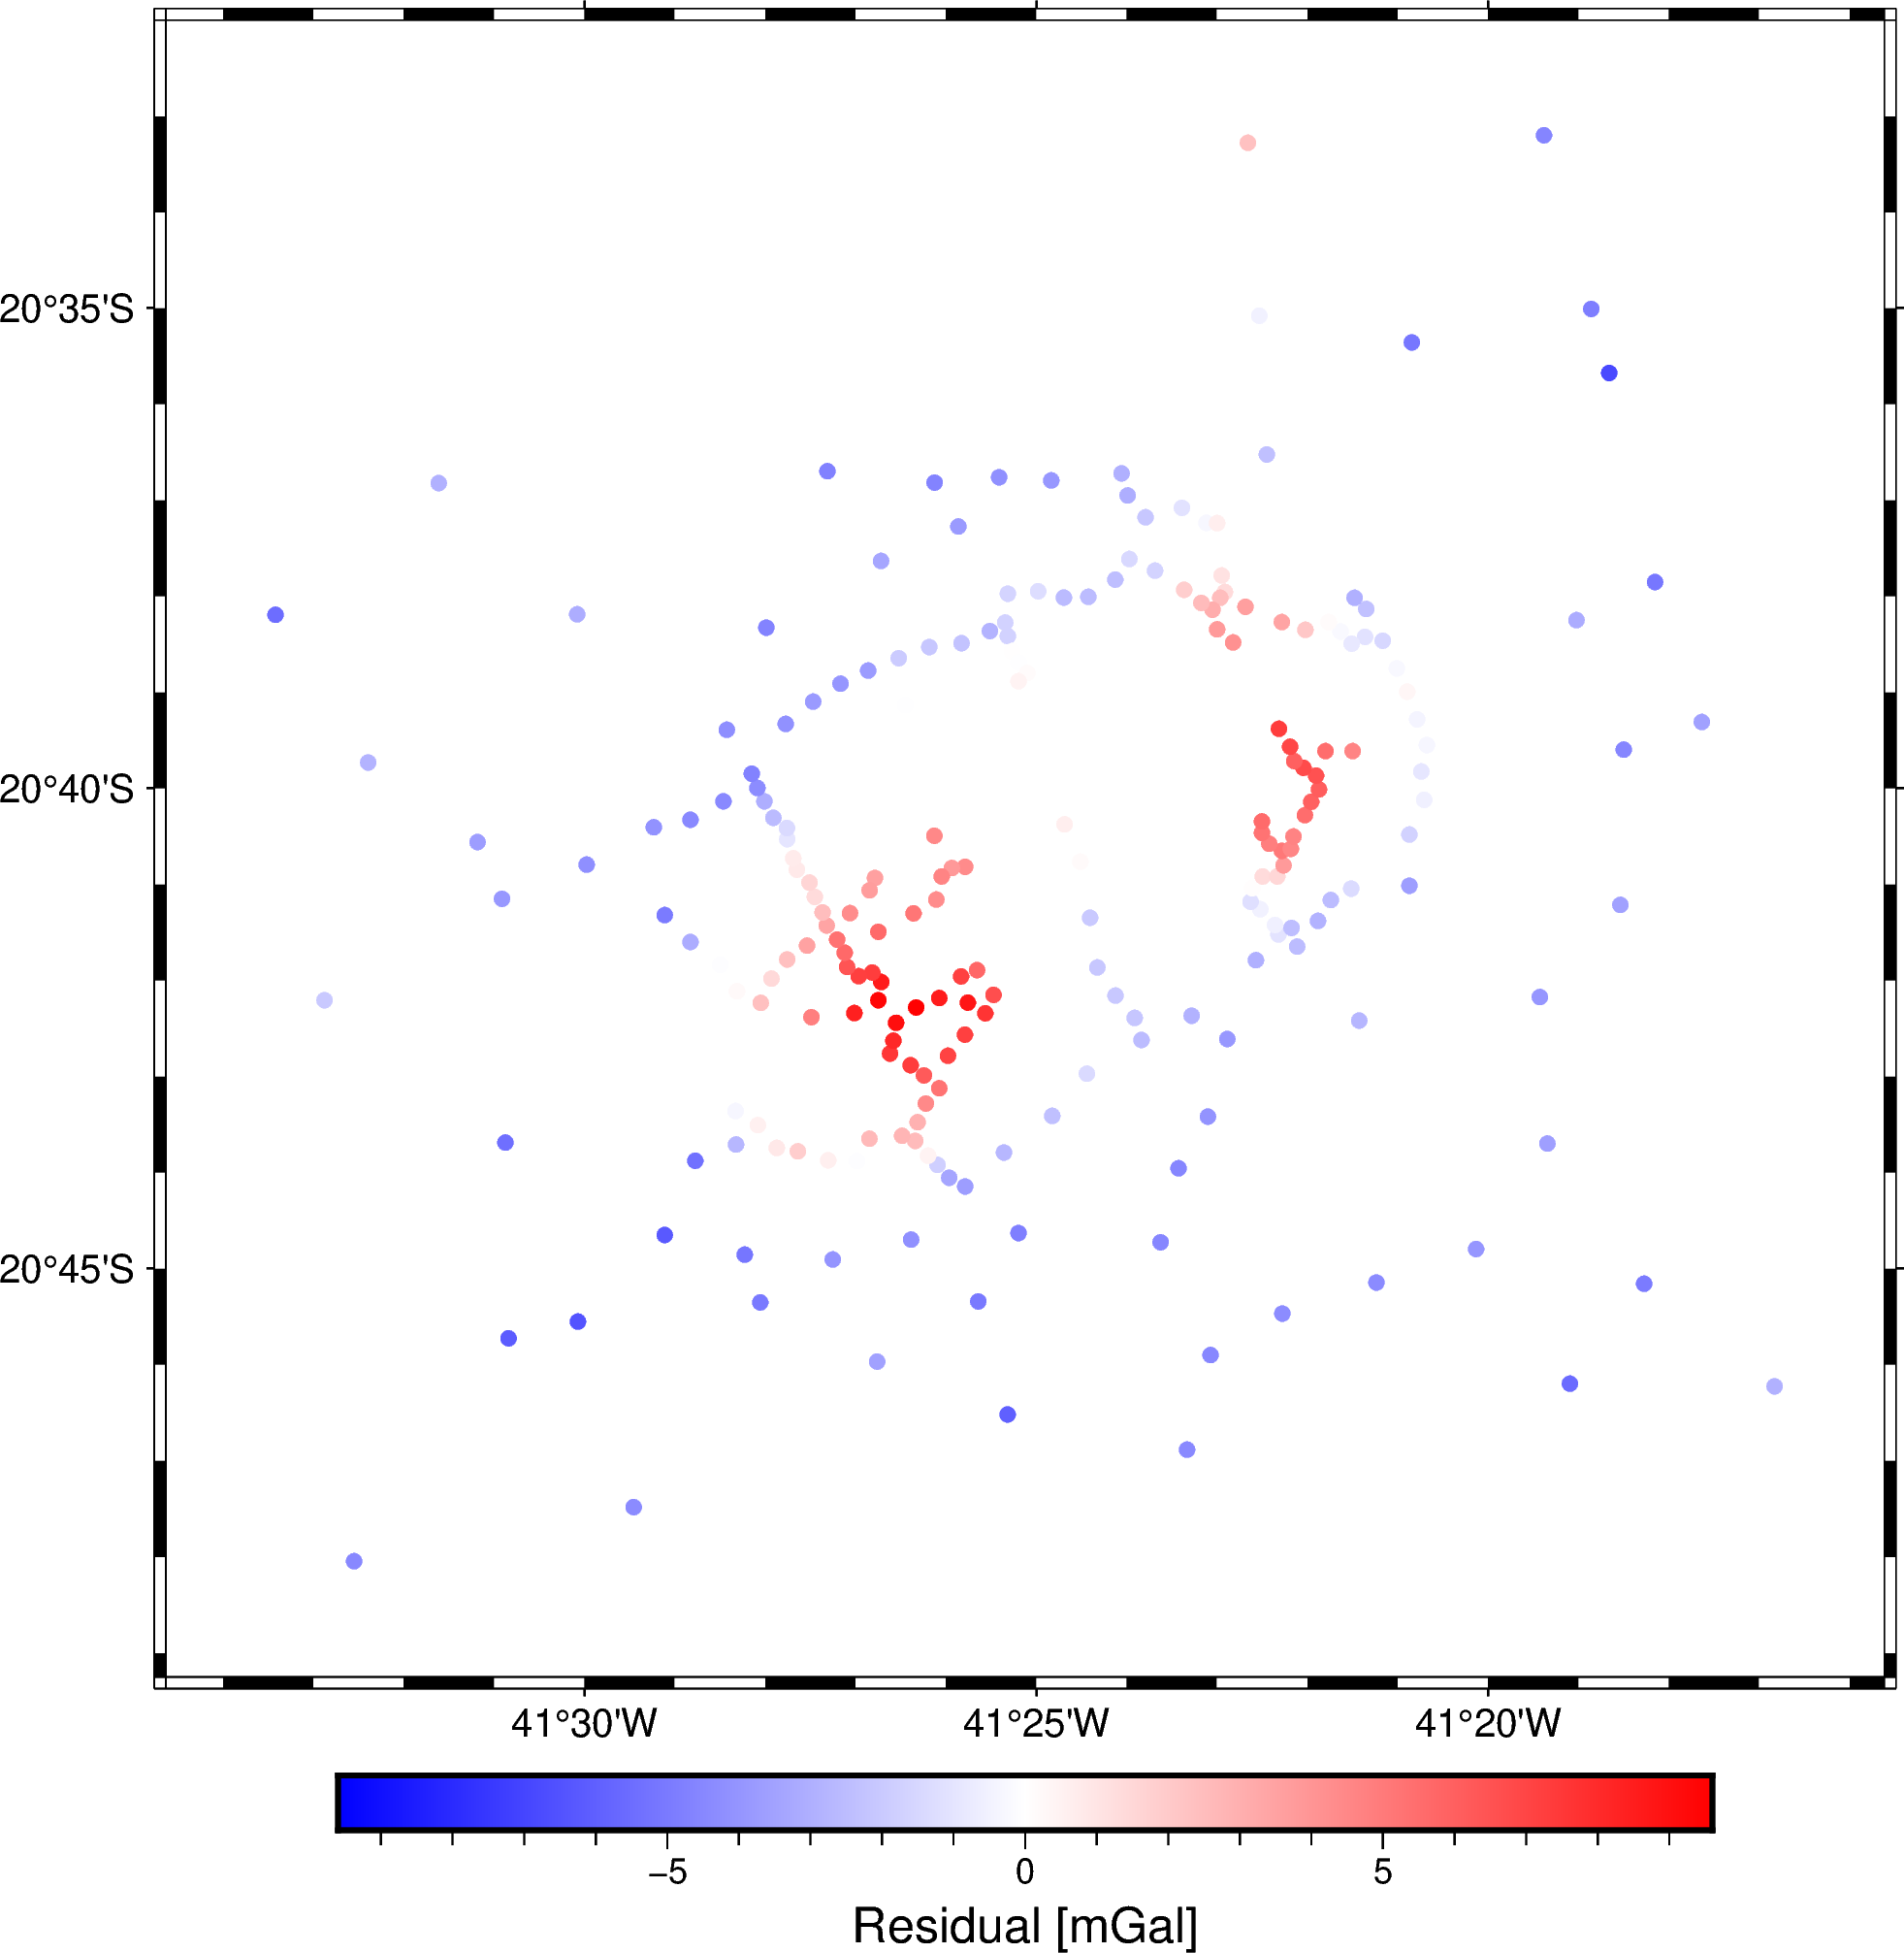

In [29]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.residual_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.residual_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Residual [mGal]"')
fig.show()

## Interpolação com fontes equivalentes

In [30]:
eqs = hm.EquivalentSources(damping=1.0, depth=2e3)
eqs.fit((data.easting_m, data.northing_m, data.height_geometric_m), data.residual_mgal)

EquivalentSources(damping=1.0, depth=2000.0)

In [31]:
# Interpolar extra coord a partir da topografia
grid_extra_coord = vd.grid_coordinates(region, spacing= 2 / 3600)


interpolator = vd.KNeighbors()
topography_table = vd.grid_to_table(topography)
interpolator.fit((topography_table.longitude, topography_table.latitude), topography_table.elevation)
extra_coord=interpolator.predict((grid_extra_coord[0], grid_extra_coord[1]))

# geoid_values = np.reshape(geoid_1.elevation, topography.shape)
coordinates_grid = ([grid_extra_coord[0], grid_extra_coord[1], extra_coord])

In [37]:
residual_grid = eqs.grid(
    # coordinates=vd.grid_coordinates(region, spacing=2 / 3600, extra_coords=0.5e3),
    coordinates=coordinates_grid,
    data_names="gravity_residual",
    dims=("latitude", "longitude"),
    projection=projection,
)
residual_grid

<xarray.Dataset>
Dimensions:           (latitude: 447, longitude: 499)
Coordinates:
  * longitude         (longitude) float64 -41.56 -41.56 -41.56 ... -41.28 -41.28
  * latitude          (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55
    upward            (latitude, longitude) float32 384.0 377.0 ... 550.0 573.0
Data variables:
    gravity_residual  (latitude, longitude) float64 -3.782 -3.813 ... -2.984
Attributes:
    metadata:  Generated by EquivalentSources(damping=1.0, depth=2000.0)

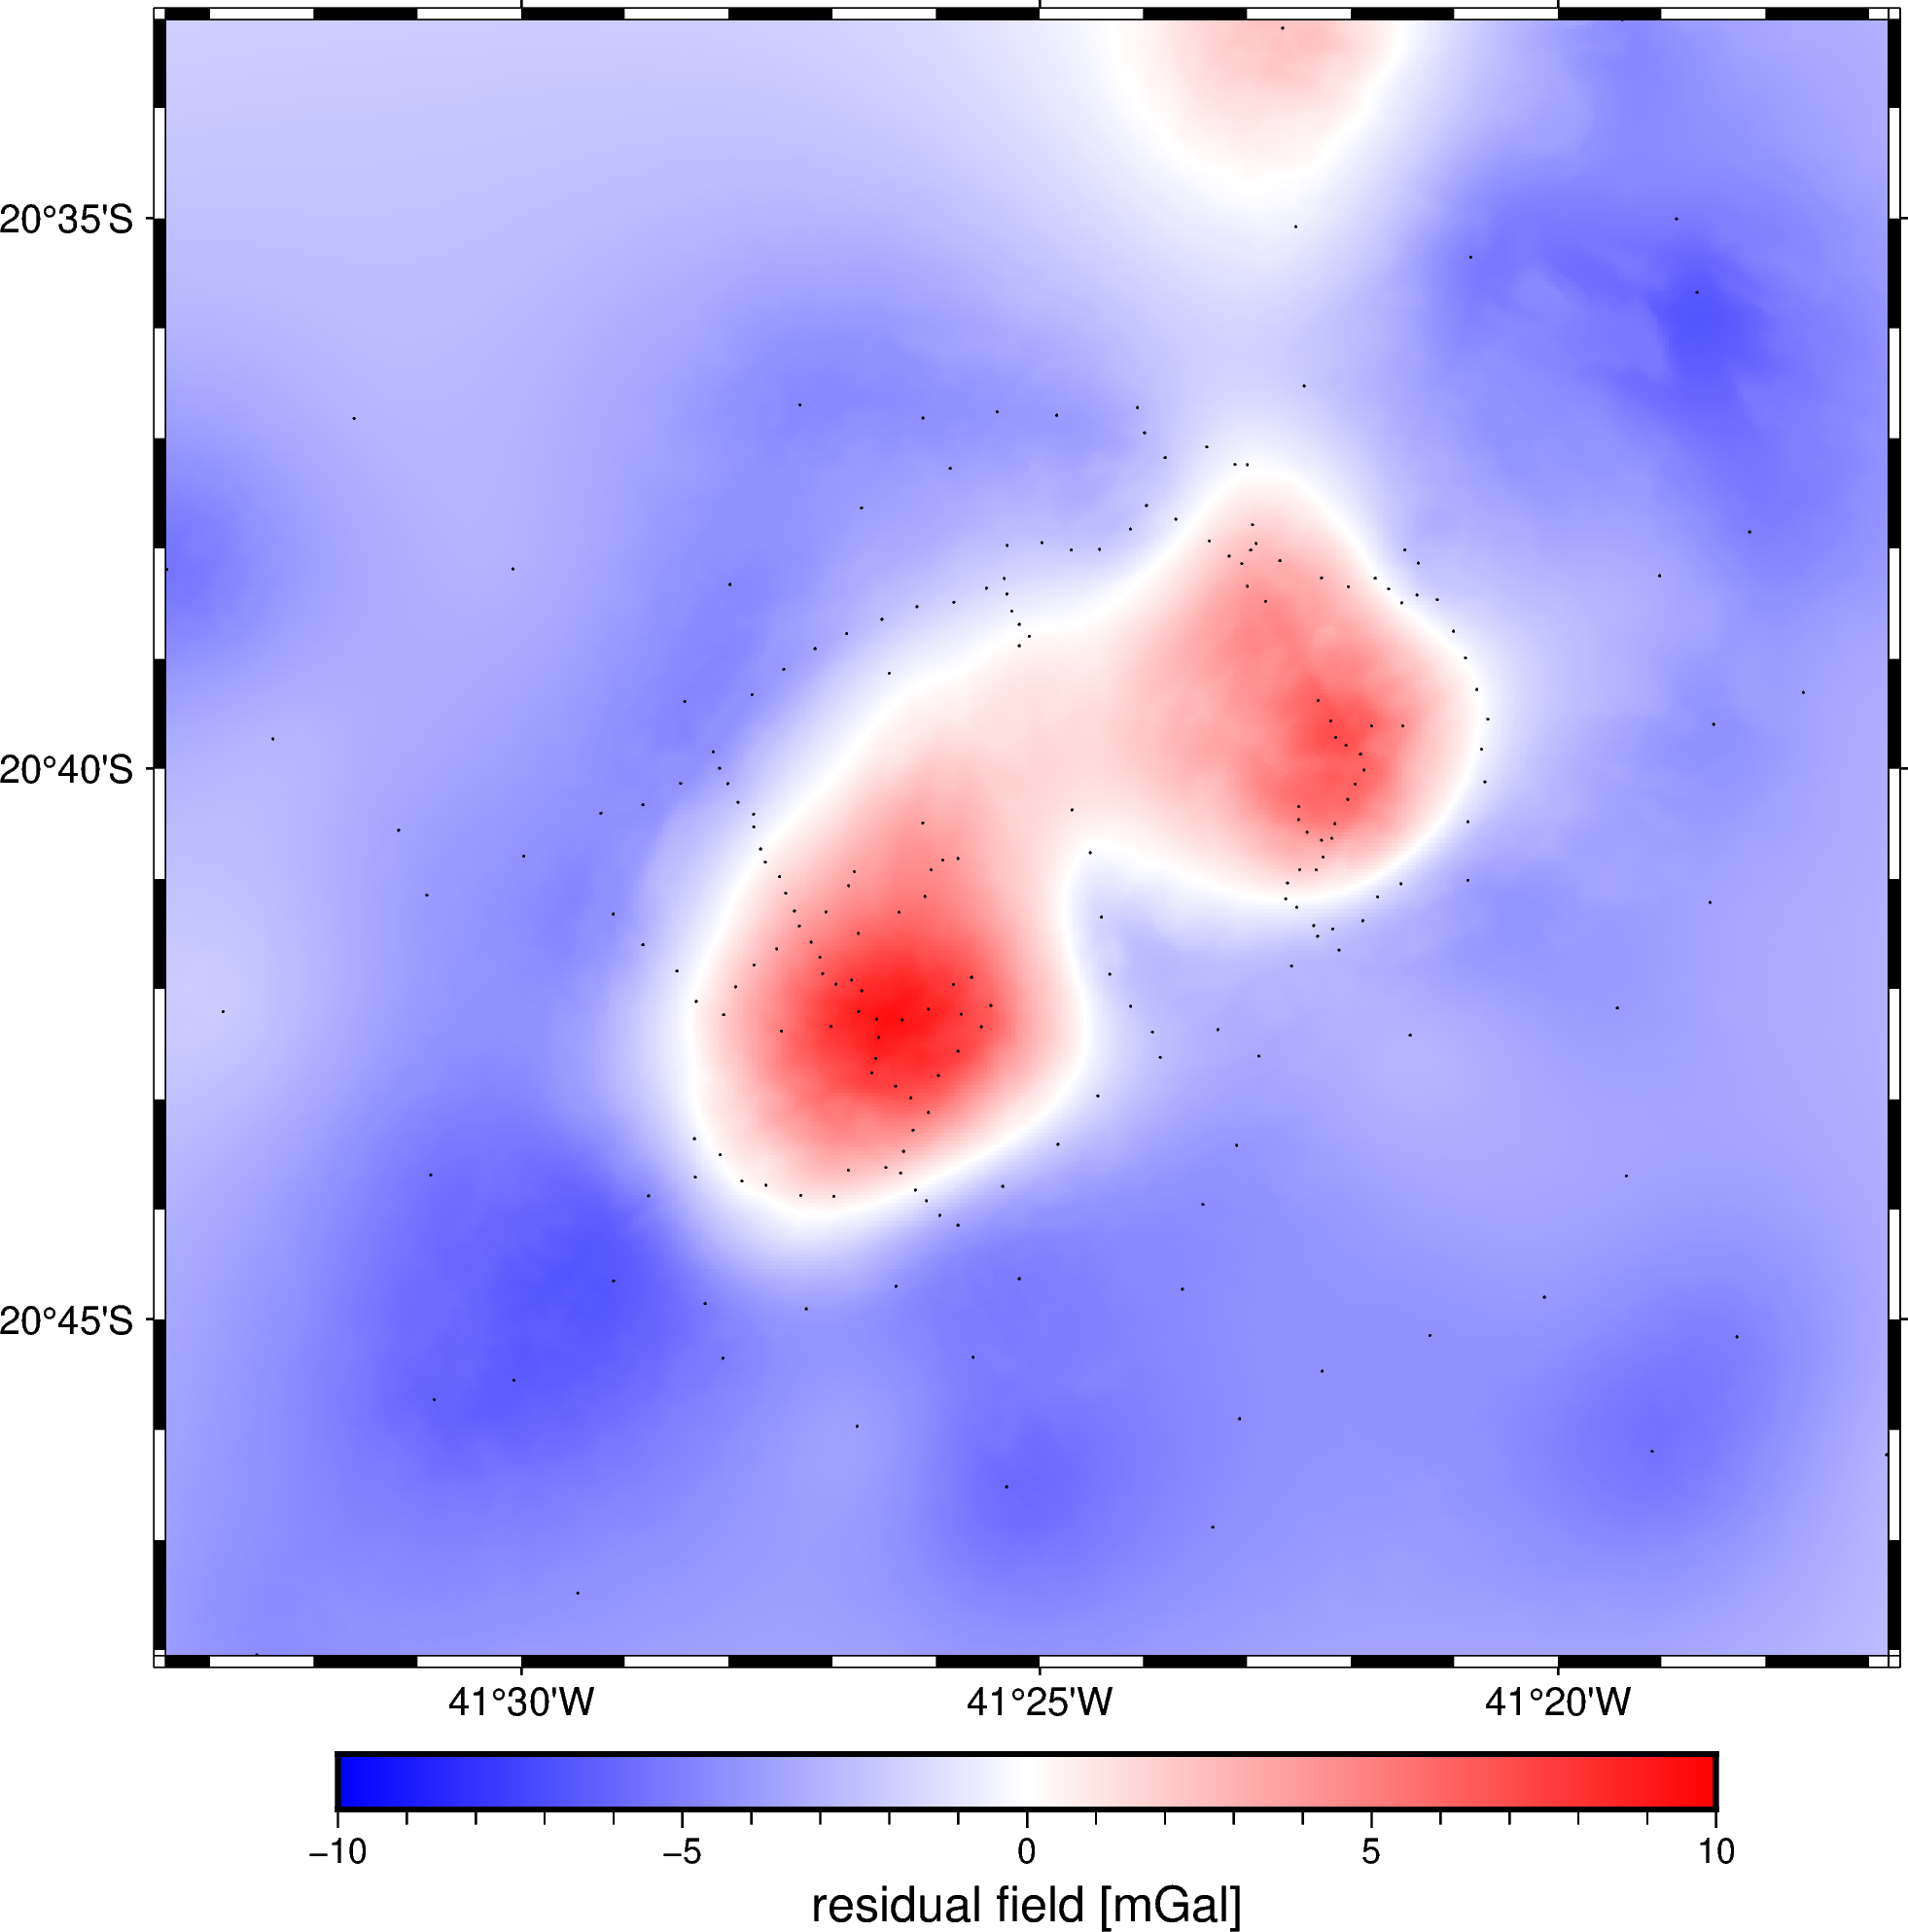

In [38]:
fig = pygmt.Figure()
scale = vd.maxabs(residual_grid.gravity_residual)
pygmt.makecpt(cmap="polar", series=[-10, 10], no_bg=True)
fig.grdimage(
    residual_grid.gravity_residual,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=region
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()

![](https://www.fatiando.org/tutorials/_images/bushveld_igneous_complex_geology.jpg)

# Calculate derivatives and total gradient

In [39]:
residual_grid = residual_grid.assign(derivative_easting=hm.derivative_easting(residual_grid.gravity_residual, order=1, method='finite-diff'))
residual_grid = residual_grid.assign(derivative_northing=hm.derivative_northing(residual_grid.gravity_residual, order=1, method='finite-diff'))
residual_grid = residual_grid.assign(derivative_upward=hm.derivative_upward(residual_grid.gravity_residual, order=1))

residual_grid = residual_grid.assign(TG=np.sqrt(residual_grid.derivative_easting**2  +
                                                residual_grid.derivative_northing**2 +
                                                residual_grid.derivative_northing**2
                                               ))

In [40]:
residual_grid

<xarray.Dataset>
Dimensions:              (latitude: 447, longitude: 499)
Coordinates:
  * longitude            (longitude) float64 -41.56 -41.56 ... -41.28 -41.28
  * latitude             (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55
    upward               (latitude, longitude) float32 384.0 377.0 ... 573.0
Data variables:
    gravity_residual     (latitude, longitude) float64 -3.782 -3.813 ... -2.984
    derivative_easting   (latitude, longitude) float64 -56.24 -59.88 ... 33.15
    derivative_northing  (latitude, longitude) float64 -34.34 -37.22 ... 19.94
    derivative_upward    (latitude, longitude) float64 -3.37e+03 ... -1.13e+03
    TG                   (latitude, longitude) float64 74.3 79.73 ... 45.9 43.52
Attributes:
    metadata:  Generated by EquivalentSources(damping=1.0, depth=2000.0)

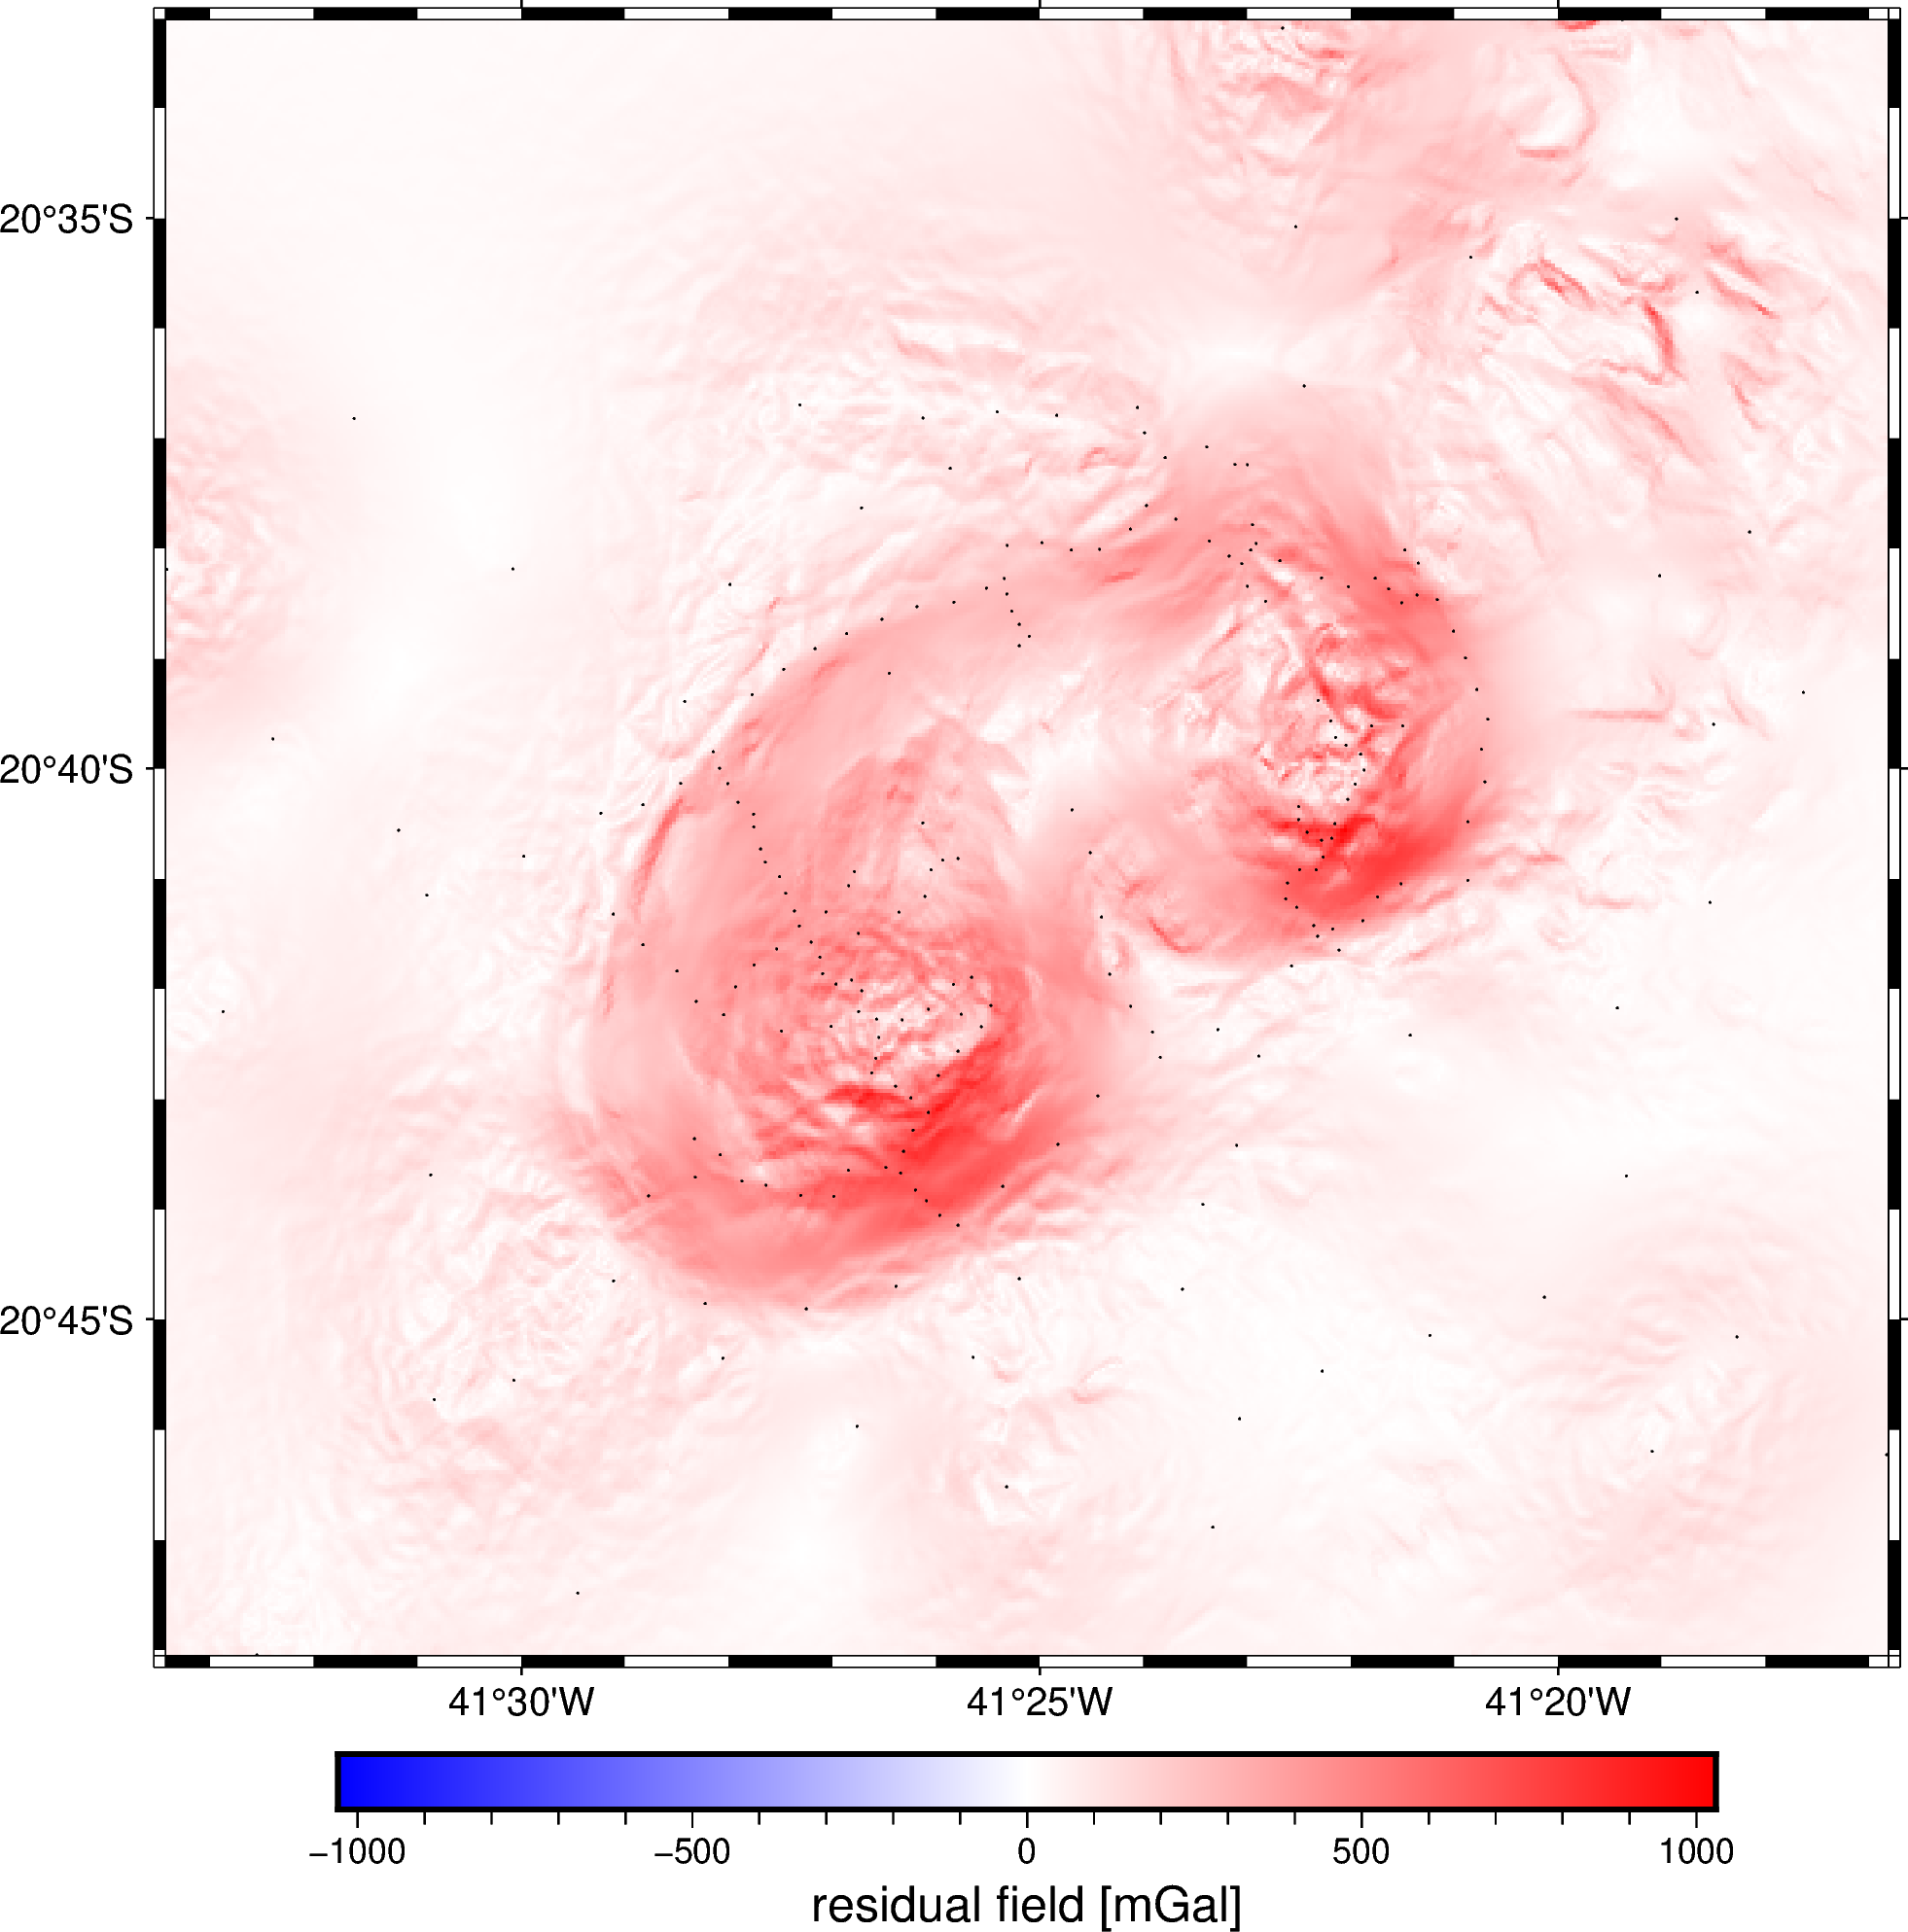

In [45]:
fig = pygmt.Figure()
scale = vd.maxabs(residual_grid.TG)
pygmt.makecpt(cmap="polar", series=[-scale, scale], no_bg=True)
fig.grdimage(
    residual_grid.TG,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=region
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()